# Problem Statement:

- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 
- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal 

 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


Lets divide the entire process to following steps

- Step 1 : Reading and understanding data
- Step 2. Checking for duplicates and missing value treatment
- Step 3. Exploratory data analysis
- Step 4. Outlier treatment
- Step 5. Creating Dummy variables
- Step 6. Scaling data
- Step 7. Train test split
- Step 8. Model bulding and Evaluation


# Step 1: Reading and understanding data

In [1]:
# Importing required libraries and warnings

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV



In [2]:
pd.set_option('display.max_rows', 40, 'display.max_columns',81)

In [3]:
# Reading data

housing = pd.read_csv("train.csv")

In [4]:
# Checking top 5 rows in the data

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking shape
housing.shape

(1460, 81)

There are 
> - 1460 rows
> - 81 columns

In [6]:
# Describing the data

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking data info
 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 2: Checking for duplicates and missing value treatment


In [8]:
# Checking for duplicates

sum(housing.duplicated(subset='Id')) == 0

True

There are no duplicate values in the given data

In [9]:
#calculating the age for the column YearBuilt

housing['Age_of_house'] = 2021 - housing['YearBuilt']

We can drop the remaining columns from the data since the age of property is most important.

In [10]:
housing.drop(['YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace= True)

In [11]:
# Dropping Id column from the dataframe
housing.drop('Id', axis = 1, inplace=True)

In [12]:
# Checking for missing values

missingdata = pd.DataFrame(round(housing.isnull().sum()/len(housing),2)*100, columns= ['Percentage of missing data'])

In [13]:
# Checking missing data columns greater than zero

missingdata[missingdata['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data
PoolQC,100.0
MiscFeature,96.0
Alley,94.0
Fence,81.0
FireplaceQu,47.0
LotFrontage,18.0
GarageType,6.0
GarageFinish,6.0
GarageQual,6.0
GarageCond,6.0


Dealing with each column having null values

#### PoolQC


In [14]:
# Checking value counts for nan values count
housing.PoolQC.value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

Here NAN indicates No Pool. so, replacing these NaN values with "No pool"

In [15]:
# filling NaN values with 'No Pool'
housing.PoolQC.fillna('No Pool', axis= 0, inplace = True)

In [16]:
# Checking null values count again
housing.PoolQC.isnull().sum()

0

#### MiscFeature

In [17]:
# Checking value counts for nan values count
housing.MiscFeature.value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Here NaN indicates None. Replacing NaN's with 'None'

In [18]:
# filling NaN values with 'None'
housing.MiscFeature.fillna('None', axis =0, inplace=True)

In [19]:
# Checking null values count again
housing.MiscFeature.isnull().sum()

0

#### Alley

In [20]:
# Checking value counts for nan values count
housing.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Here NaN indicates 'No alley access'. Replacing NaN's with 'No alley access'

In [21]:
# filling NaN values with 'No alley access'
housing.Alley.fillna('No alley access', axis =0, inplace=True)

In [22]:
# Checking null values count again
housing.Alley.isnull().sum()

0

#### Fence

In [23]:
# Checking value counts for nan values count
housing.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Here NaN indicates No Fence. So, replacing NAN's with 'No Fence'

In [24]:
# filling NaN values with 'No Fence'
housing.Fence.fillna('No Fence', axis =0, inplace=True)

In [25]:
# Checking null values count again
housing.Fence.isnull().sum()

0

#### FireplaceQu

In [26]:
# Checking value counts for nan values count
housing.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Here NaN indicates No Fireplace. Hence, replacing Nan's with 'No Fireplace'

In [27]:
# filling NaN values with 'No Fence'
housing.FireplaceQu.fillna('No Fireplace', axis =0, inplace=True)

In [28]:
# Checking null values count again
housing.FireplaceQu.isnull().sum()

0

#### LotFrontage column

In [29]:
# Dealing with LotFrontage missing value column
housing.LotFrontage.value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

LotFrontage indicates Linear feet of street connected to property. Lets look at the distribution and stats of this column

In [30]:
# describing column to get more details
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

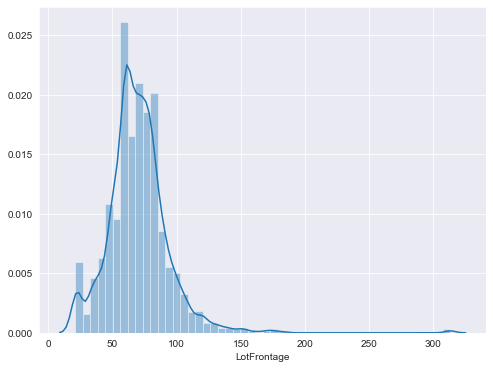

In [31]:
# Checking distplot to check more details
plt.figure(figsize=[8,6])
sns.distplot(housing.LotFrontage, bins= 50)
plt.show()

Lets replace null values in this column with median

In [32]:
# Filling null values with median
housing.LotFrontage.fillna(housing.LotFrontage.median(),inplace=True, axis = 0)

In [33]:
# Checking null values again to confirm
housing.LotFrontage.isnull().sum()

0

#### GarageType

In [34]:
# Checking value counts to check count of null values
housing.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [35]:
# Replacing null values with "No Garage"

housing.GarageType.fillna('No Garage', inplace=True, axis=0)

In [36]:
# Checking null values again to confirm
housing.GarageType.isnull().sum()

0

#### GarageFinish

In [37]:
# Checking value counts to check count of null values
housing.GarageFinish.value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [38]:
# Replacing null values with "No Garage"

housing.GarageFinish.fillna('No Garage', inplace=True, axis=0)

In [39]:
# Checking null values again to confirm
housing.GarageFinish.isnull().sum()

0

#### GarageQual

In [40]:
# Checking value counts to check count of null values
housing.GarageQual.value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [41]:
# Replacing null values with "No Garage"

housing.GarageQual.fillna('No Garage', inplace=True, axis=0)

In [42]:
# Checking null values again to confirm
housing.GarageQual.isnull().sum()

0

#### GarageCond

In [43]:
# Checking value counts to check count of null values
housing.GarageCond.value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [44]:
# Replacing null values with "No Garage"

housing.GarageCond.fillna('No Garage', inplace=True, axis=0)

In [45]:
# Checking null values again to confirm
housing.GarageQual.isnull().sum()

0

#### BsmtQual

In [46]:
# Checking value counts to check count of null values

housing.BsmtQual.value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [47]:
# Replacing null values with 'No Basement'

housing.BsmtQual.fillna('No Basement', axis = 0, inplace=True)

In [48]:
# Checking null values again to confirm
housing.BsmtQual.isnull().sum()

0

#### BsmtCond

In [49]:
# Checking value counts to check count of null values

housing.BsmtCond.value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [50]:
# Replacing null values with 'No Basement'

housing.BsmtCond.fillna('No Basement', axis = 0, inplace=True)

In [51]:
# Checking null values again to confirm
housing.BsmtCond.isnull().sum()

0

#### BsmtExposure

In [52]:
# Checking value counts to check count of null values

housing.BsmtExposure.value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [53]:
# Replacing null values with 'No Basement'

housing.BsmtExposure.fillna('No Basement', axis = 0, inplace=True)

In [54]:
# Checking null values again to confirm

housing.BsmtExposure.isnull().sum()

0

#### BsmtFinType1

In [55]:
# Checking value counts to check count of null values

housing.BsmtFinType1.value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [56]:
# Replacing null values with 'No Basement'

housing.BsmtFinType1.fillna('No Basement', axis = 0, inplace=True)

In [57]:
# Checking null values again to confirm

housing.BsmtFinType1.isnull().sum()

0

#### BsmtFinType2

In [58]:
# Checking value counts to check count of null values

housing.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [59]:
# Replacing null values with 'No Basement'

housing.BsmtFinType2.fillna('No Basement', axis = 0, inplace=True)

In [60]:
# Checking null values again to confirm

housing.BsmtFinType2.isnull().sum()

0

#### MasVnrType

In [61]:
# Checking value counts to check count of null values

housing.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [62]:
# Replacing null values with 'Unknown'

housing.MasVnrType.fillna('Unknown', axis = 0, inplace=True)

In [63]:
# Checking null values again to confirm

housing.MasVnrType.isnull().sum()

0

#### MasVnrArea

In [64]:
# Checking value counts to check count of null values

housing.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

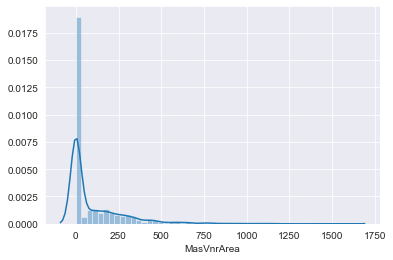

In [65]:
# Checking distribution plot for Age_GarageYrblt
sns.distplot(housing.MasVnrArea)
plt.show()

In [66]:
# Replacing null values with '0'

housing.MasVnrArea.fillna(0, axis = 0, inplace=True)

In [67]:
# Checking null values again to confirm

housing.MasVnrArea.isnull().sum()

0

In [68]:
# Checking null value percentage of columns again

missingdata = pd.DataFrame(round(housing.isnull().sum()/len(housing),2)*100, columns= ['Percentage of missing data'])

missingdata

,Percentage of missing data
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
Street,0.0
...,...
MoSold,0.0
SaleType,0.0
SaleCondition,0.0
SalePrice,0.0


There are no missing values in the data

Changing datatypes of 'OverallQual','OverallCond','MSSubClass' as these are object data types

In [69]:
# Changing datatypes of these columns

housing[['OverallQual','OverallCond','MSSubClass']] = housing[['OverallQual','OverallCond','MSSubClass']].astype('object')

In [70]:
# Checking info again
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [71]:
# Taking numerical columns to a list
numerical_cols = housing.select_dtypes(include=['int64','float64']).columns

In [72]:
# Numerical columns in our dataset
numerical_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_of_house'],
      dtype='object')

In [73]:
# Selecting dtypes of int64 and float64

categorical_cols = housing.select_dtypes(exclude=['int64','float64']).columns

In [74]:
# Categorical columns

categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

# Step 3: Exploratory Data Analysis

### Univariate analysis

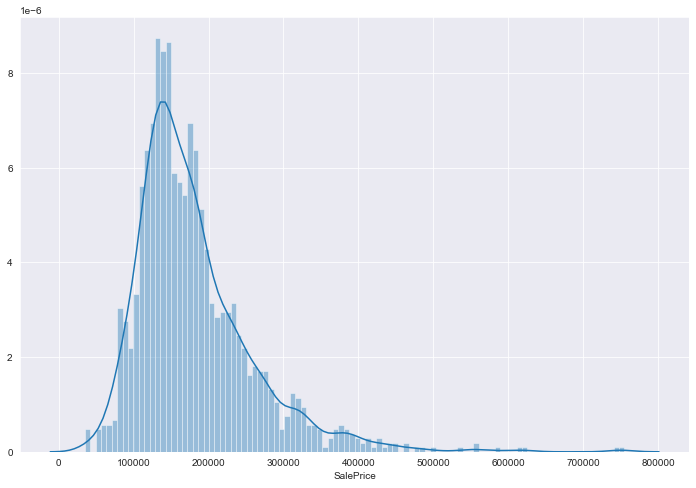

In [75]:
# looking at Target variable distribution
plt.figure(figsize=[12,8])
sns.distplot(housing.SalePrice,bins=100)
plt.show()

As we can see there is a skewness in the plot. Lets look at the skewness value

In [76]:
# Skewness
housing.SalePrice.skew()

1.8828757597682129

As we can see that the skewness value is more than 1, which indicates the distribution is highly skewed. We need to transform the target variable so that the distribution should become normal

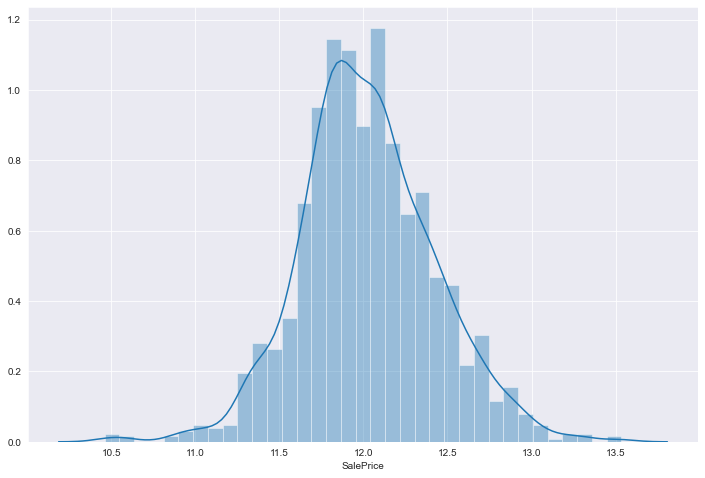

In [77]:
# Plotting transformed variable to check the skewness
plt.figure(figsize=[12,8])
sns.distplot(np.log(housing.SalePrice))
plt.show()

As we can see that the log transformation is acceptable as the distribution is normal

In [78]:
# log Transforming target variable
housing['Transformed_price'] = np.log(housing.SalePrice)

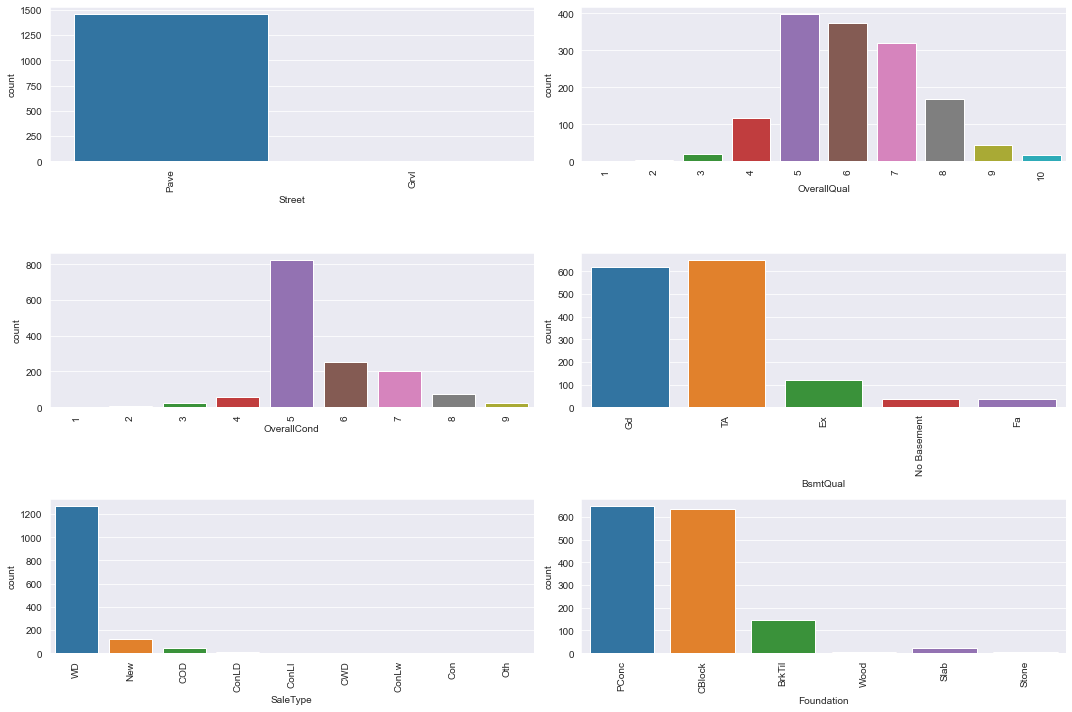

In [79]:
# Plotting count plot for all the categorical variables

cols = ['Street','OverallQual','OverallCond','BsmtQual','SaleType','Foundation']
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(3,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plot we can see that

- All the houses have Paved type of road access to property
- Overall quality of the houses are mostly in 5,6,7 which means average, above average and good
- Overall condition of the houses are mostly average
- Most of the houses basement quality is good and typical
- Mostly sales are happend for Warranty Deed - Conventional, home just constructed and sold
- Most of the houses in the given data are construction using foundation of Poured Contrete and Cinder Block type

Also, we can see that street is skewed towards only one variables. So, we can drop this variable from the data

In [80]:
# Creating drop cols list to drop variables
drop_cols = ['Street']

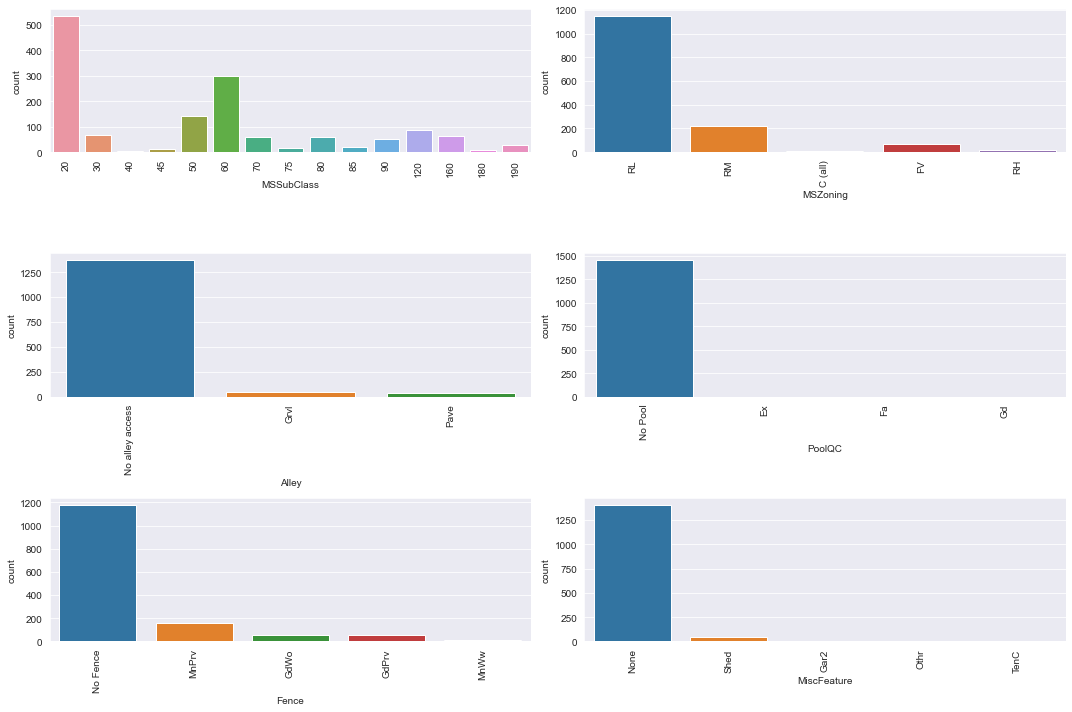

In [81]:
# Plotting count plot for all the categorical variables

cols = ['MSSubClass','MSZoning','Alley','PoolQC','Fence','MiscFeature']
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(3,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plots, we can see that 

- MsSubClass identifies the type of dwelling involved in the sale. It seems that 1-STORY 1946 & NEWER ALL STYLES and 2-STORY 1946 & NEWER are most house types
- MSZoning identifies the general zoning classification of the sale. Residential Low Density and Residential Medium Density seems to be more important zones.
- Most of the properties don't have alley access and pool
- Only few properties have fence.
- Most properties don't have any Misc features

We can see that PoolQC is skewed towards only one No pool value. So dropping this variable from the data

In [82]:
# Adding PoolQC to the drop_cols list

drop_cols.append('PoolQC')

In [83]:
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

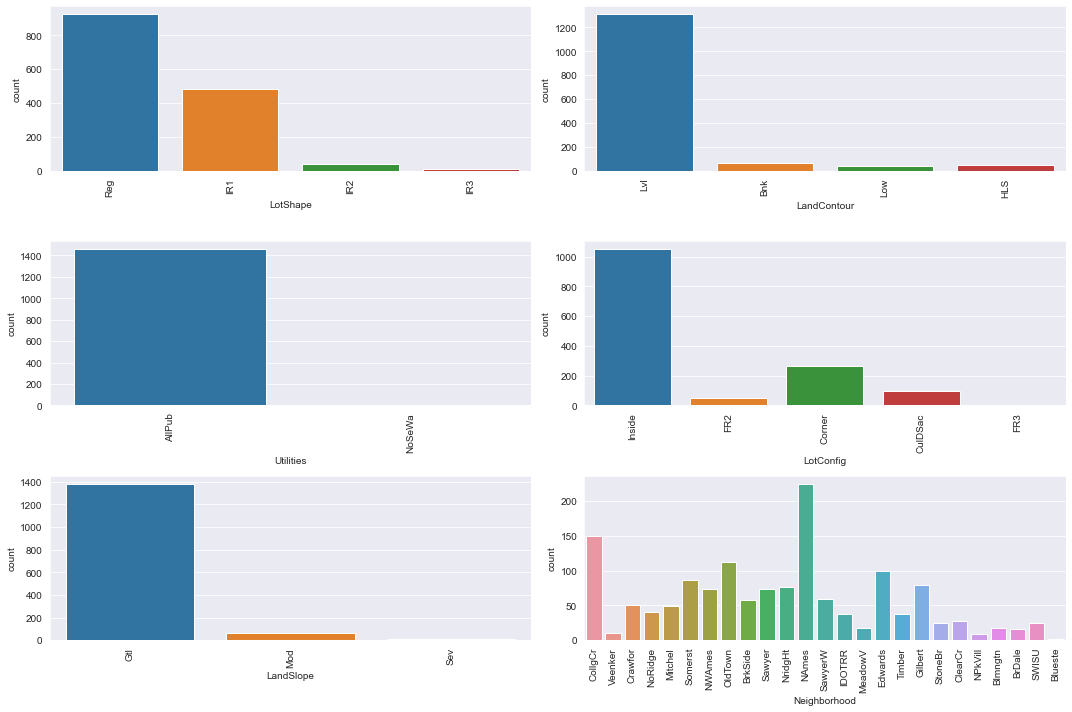

In [84]:
# Plotting count plot for all the categorical variables

cols = ['LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood']
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(3,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above count plots, we can see that

- We can see that most of the properties lotshape is Regular and Regular
- LandContour gives the flatness of the property. Most houses are Near Flat/Level
- All the properties have public Utilities (E,G,W,& S)
- most properties Lot configuration seems to be inside and corner lot
- Most houses slope is gentle slope
- Most properties are from North Ames and College Creek

We can see that Utilities column skewed towards only one value, so dropping this column from the data

In [85]:
# Adding utilities column to drop cols

drop_cols.append('Utilities')

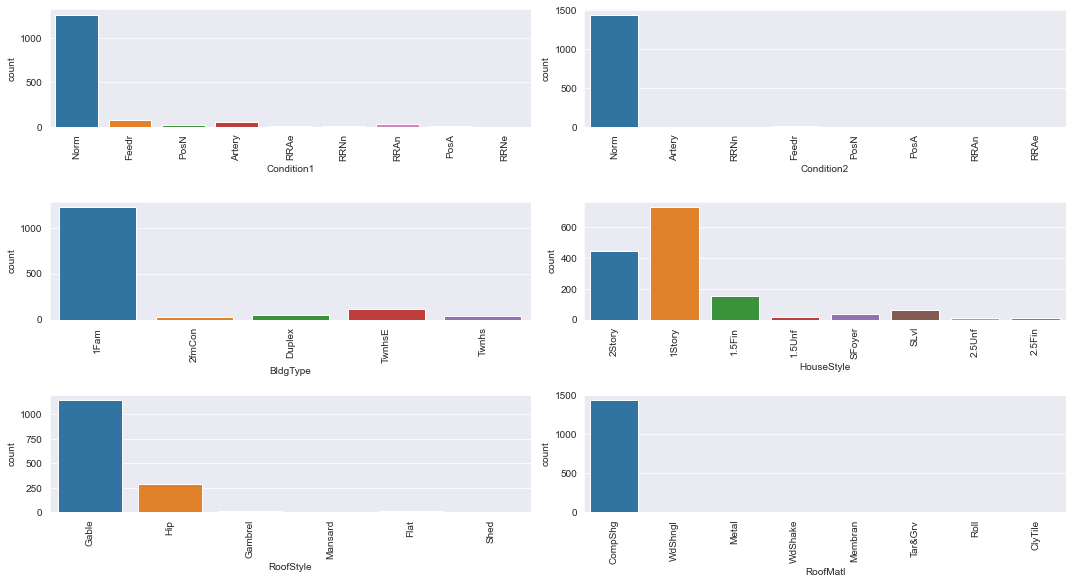

In [86]:
# Plotting count plot for all the categorical variables

cols = ['Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl']
        
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(4,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plots, we can see that 

- Condition1 indicates proximity to various conditions. Here most of the properties are Normal, few properties are adjacent to feeder street
- Condition2 indicates proximity to various conditions (if more than one is present), here most of the properties are normal
- Here Bldgtype indicates type of dwelling, most of the properties are Single-family Detached
- House style indicates Style of dwelling, here most properties are One story and Two story buildings.
- Most properties roof style is Gable and Hip type
- All properties roof material is Standard (Composite) Shingle

Here, Condition2 and RoofMatl are skewed towards only one value and have low variance. Hence dropping these columns from the data

In [87]:
# adding these columns to dropcols

drop_cols.append('RoofMatl')
drop_cols.append('Condition2')


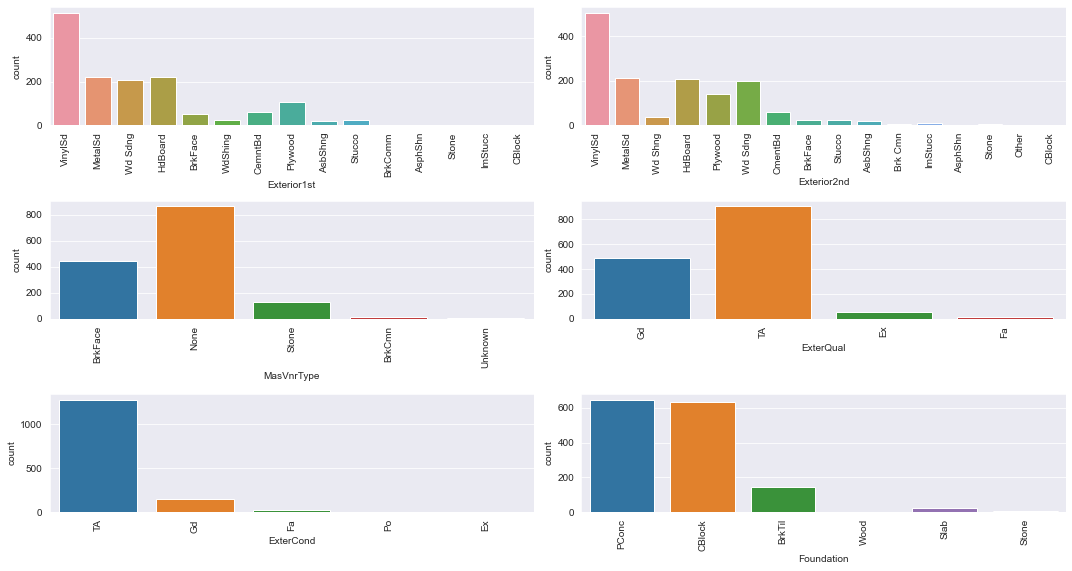

In [88]:
# Plotting count plot for all the categorical variables

cols = ['Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation']
        
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(4,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plot, we can see that 

- Exterior1st indicates exterior covering on house, most properties exterior covering is Vinyl Siding and Hard Board
- Exterior2nd indicates exterior covering on house (if more than one material), here most properties Vinyl Siding and Metal Siding
- MasVnrType indicates Masonry veneer type, most properties don't have this feature and few properties have Brick Common and Stone
- ExterQual evaluates the quality of the material on the exterior, most properties quality is Average/Typical, few properties are good and excellent
- ExterCond evaluates the present condition of the material on the exterior, here most properties are Average/Typical and few properties are good and fair
- Foundation indicates types of foundation, most properties foundation type is Poured Contrete and Cinder block, few properties have Brick & Tile and slab



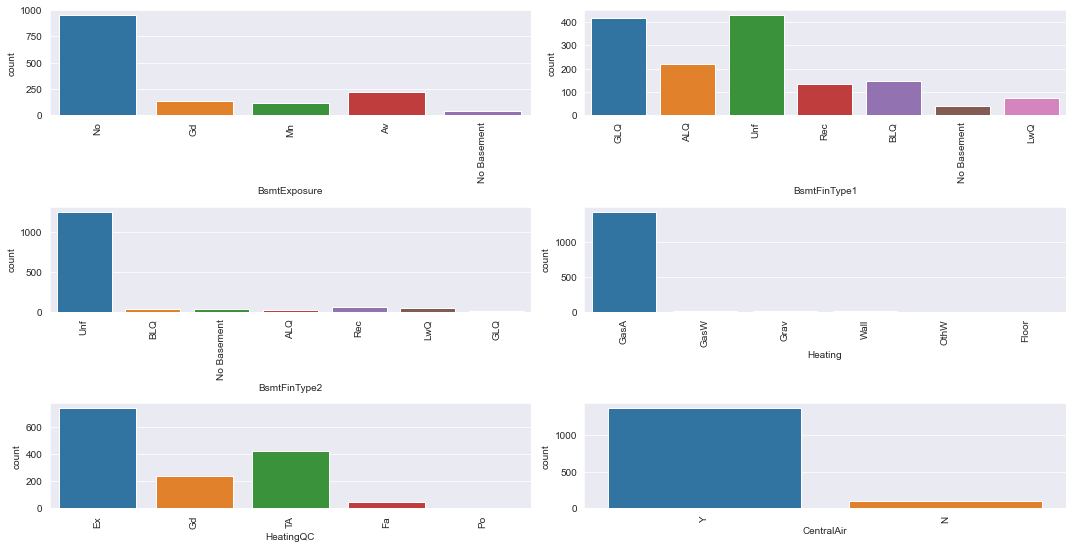

In [89]:
# Plotting count plot for all the categorical variables

cols = ['BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir']
        
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(4,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plot, we can see that 

- BsmtExposure refers to walkout or garden level walls, here most properties don't have Exposure, only few properties have average exposure and good exposure
- BsmtFinType1 indicates rating of basement finished area, 30 percent of properties basements are Unfinshed, we have properties with good living quarters and average living quarters
- BsmtFinType2 indicates rating of basement finished area (if multiple types), here most properties basements are unfinished.
- Heating indicates type of heating, here all properties are gas forced warm air furnace type. 
- Heating quality and condition of most properties are excellent and average/typical.
- Most properties have Central air conditioning

Here heating is skewed towards gas forced warm air furnace type, we can drop this column

In [90]:
# Adding column to drop cols
drop_cols.append('Heating')

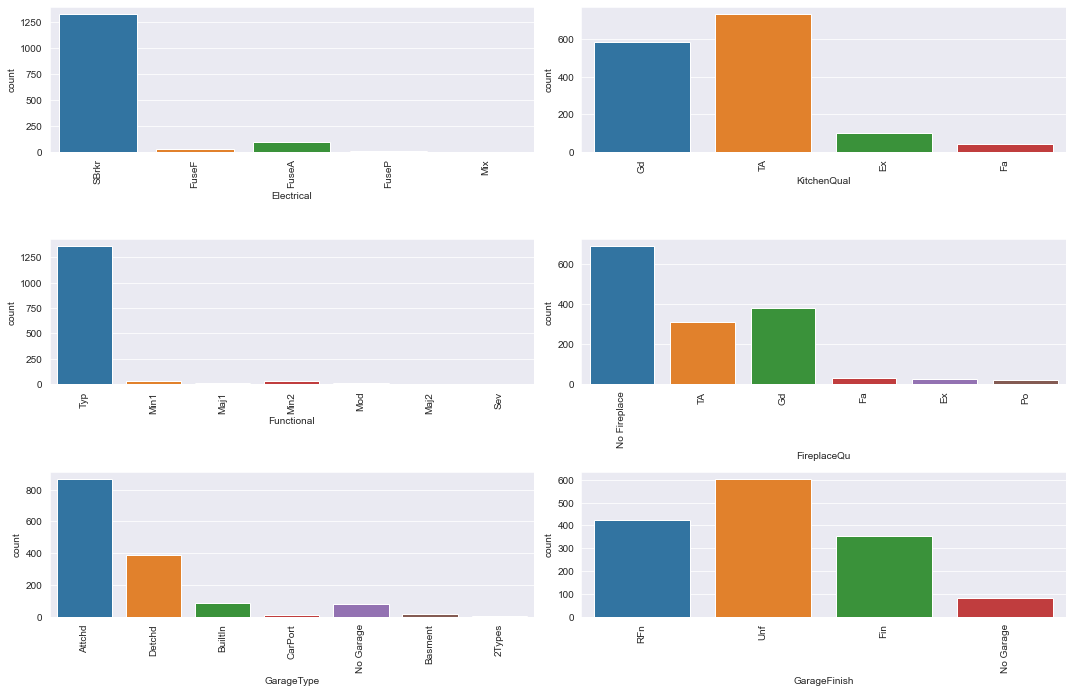

In [91]:
# Plotting count plot for all the categorical variables

cols = ['Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish']
        
plt.figure(figsize=[15,12])
for col in enumerate(cols):
    plt.subplot(4,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plot, we can see that

- Most of the houses Electrical system ty Standard Circuit Breakers & Romex and few properties have Fuse Box over 60 AMP and all Romex wiring (Average) type
- Kitchen quality is typical or average for half of the properties and few properties have Good and excellent.
- Almost all the properties functionality is typical functionality
- Most properties don't have any fireplace, few properties have fireplace with good and average condition. 
- Most garrages are attached to home and few properties don't have garrage.
- GarageFinish indicates interior finish of the garage, here most garrages are unfinished and few are rough finished and finished.

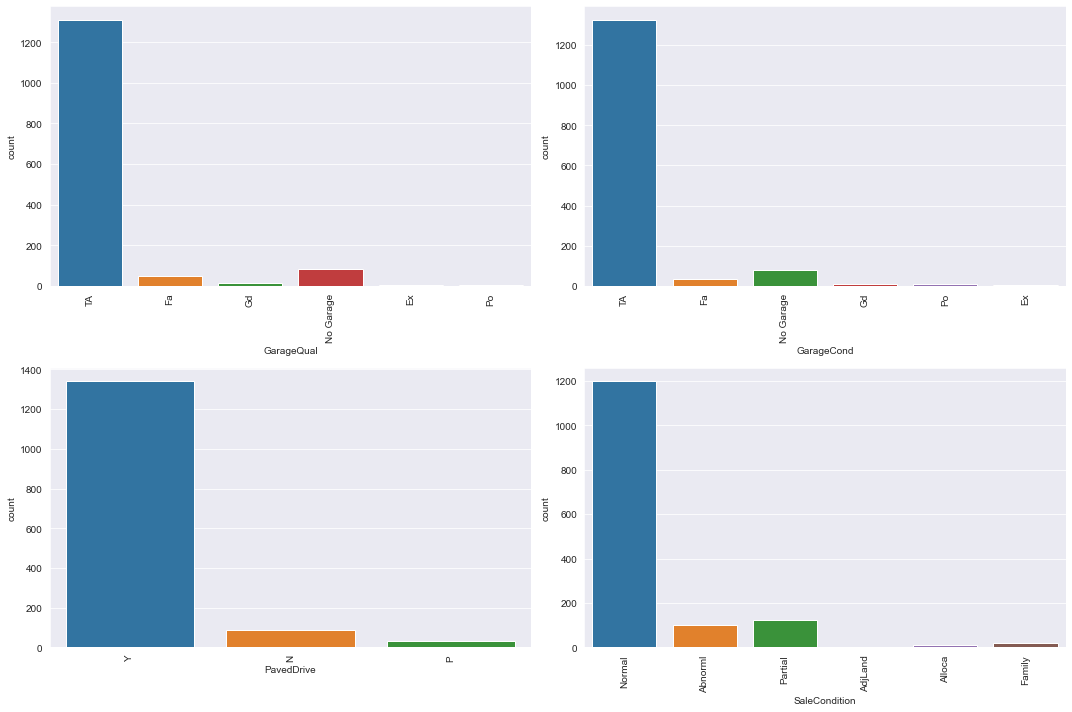

In [92]:
# Plotting count plot for all the categorical variables

cols = ['GarageQual','GarageCond','PavedDrive','SaleCondition']
        
plt.figure(figsize=[15,10])
for col in enumerate(cols):
    plt.subplot(2,2, col[0]+1)
    sns.countplot(housing[col[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

From the above plot, we can see that

- Garage quality and garage condition is typical or average for most of the properties
- Most properties have Paved driveway
- Sale condition is normal for most of the properties, few properties are completed when last assessed (associated with New Homes)

In [93]:
# Checking dropcols

drop_cols

['Street', 'PoolQC', 'Utilities', 'RoofMatl', 'Condition2', 'Heating']

In [94]:
# Dropping the columns which are skewed towards only one variable
housing.drop(drop_cols, axis=1, inplace=True)


In [95]:
# Checking shape again
housing.shape

(1460, 73)

### Bivariate analysis

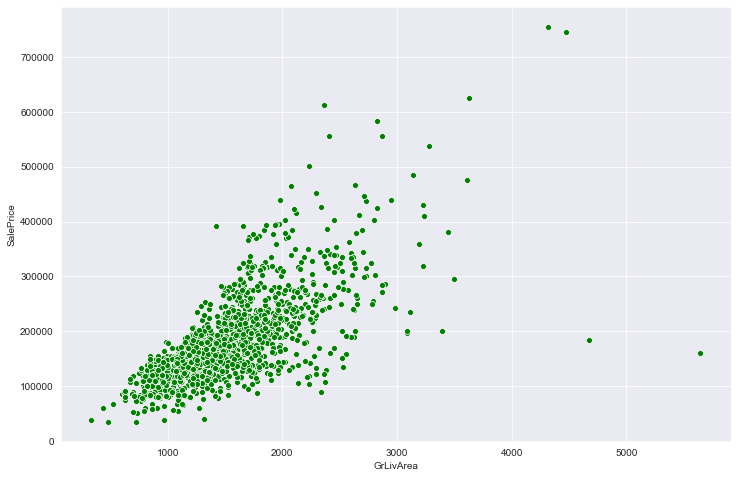

In [96]:
# Scatter plot between GrLivArea and SalePrice
plt.figure(figsize=[12,8])
sns.scatterplot(housing.GrLivArea, housing.SalePrice, color='green')
plt.show()

We can see that greater the (ground) living area square feet, the sale price is increasing and we can see a slight linear pattern from the above plot


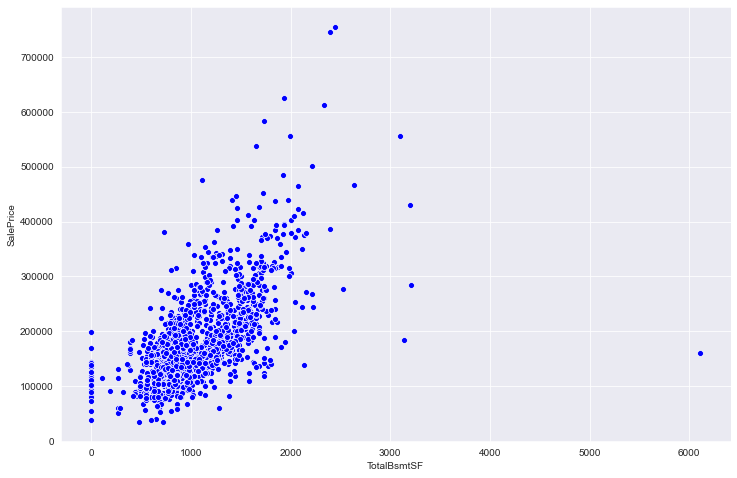

In [97]:
# Scatter plot between TotalBsmtSF and SalePrice
plt.figure(figsize=[12,8])
sns.scatterplot(housing.TotalBsmtSF, housing.SalePrice, color='blue')
plt.show()

Here, we can see greater the total square feet of basement area, the sale price is high, we can also see a linear pattern in the plot

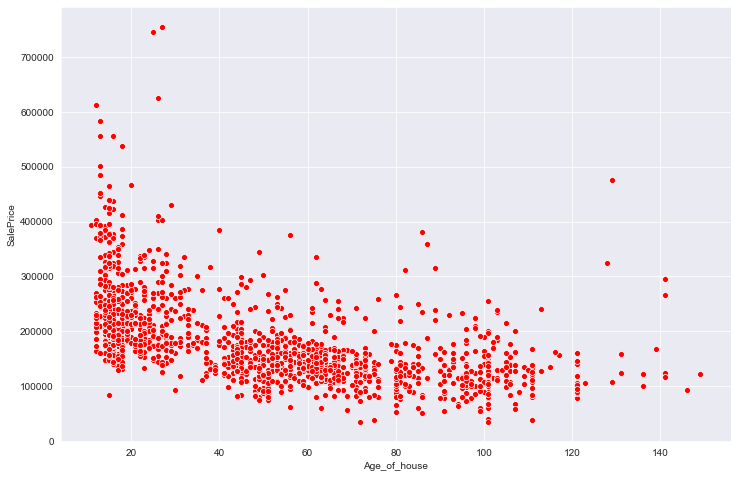

In [98]:
# Scatter plot between Age_of_house and SalePrice
plt.figure(figsize=[12,8])
sns.scatterplot(housing.Age_of_house, housing.SalePrice, color='r')
plt.show()

We can see that the if the age of the house is high, the sale price is getting decreased, there is a slight linear relationship with negative slope for this variable. 

Lets look at the pair plot for SalePrice, GrLivArea, GarageCars, TotalBasmtSF, FullBath, Age_of_house

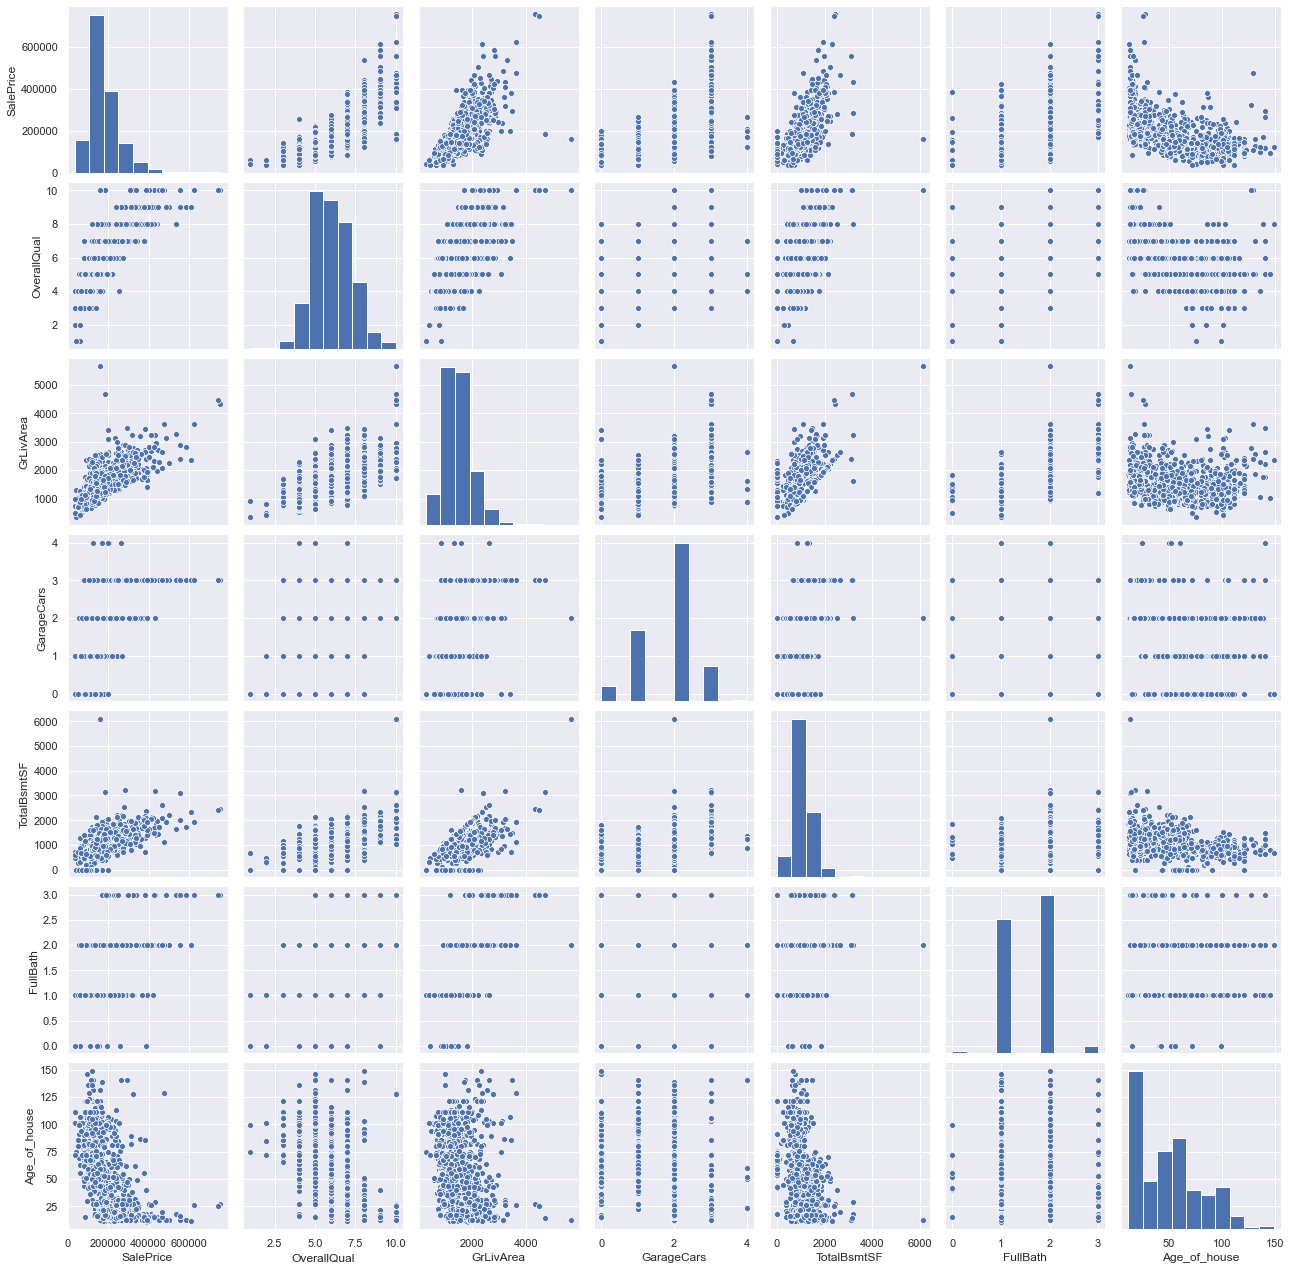

In [99]:
# Pair plot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath', 'Age_of_house']
sns.pairplot(housing[cols],size=2.5)
plt.show()

We can see that there is a linear relationship between GrLivArea, TotalbsmtSF and saleprice

### Multivariate analysis

In [100]:
# Correlation matrix of the data

correlation =  round(housing.corr(),2)
correlation

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_of_house,Transformed_price
LotFrontage,1.00,0.30,0.12,0.18,0.21,0.04,0.12,0.36,0.41,0.07,0.04,0.37,0.09,-0.01,0.18,0.05,0.24,-0.00,0.32,0.23,0.27,0.32,0.08,0.14,0.01,0.06,0.04,0.18,-0.00,0.01,0.33,-0.12,0.34
LotArea,0.30,1.00,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,0.26,-0.01,0.26
YearBuilt,0.12,0.01,1.00,0.31,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,0.52,-1.00,0.59
MasVnrArea,0.18,0.10,0.31,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.08,0.03,0.27,0.20,0.10,-0.04,0.28,0.25,0.36,0.37,0.16,0.12,-0.11,0.02,0.06,0.01,-0.03,-0.01,0.47,-0.31,0.43
BsmtFinSF1,0.21,0.21,0.25,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.39,-0.25,0.37
BsmtFinSF2,0.04,0.11,-0.05,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,0.07,-0.08,-0.03,-0.02,-0.04,-0.04,0.05,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,-0.01,0.05,0.00
BsmtUnfSF,0.12,-0.00,0.15,0.11,-0.50,-0.21,1.00,0.42,0.32,0.00,0.03,0.24,-0.42,-0.10,0.29,-0.04,0.17,0.03,0.25,0.05,0.21,0.18,-0.01,0.13,-0.00,0.02,-0.01,-0.04,-0.02,0.03,0.21,-0.15,0.22
TotalBsmtSF,0.36,0.26,0.39,0.36,0.52,0.10,0.42,1.00,0.82,-0.17,-0.03,0.45,0.31,-0.00,0.32,-0.05,0.05,-0.07,0.29,0.34,0.43,0.49,0.23,0.25,-0.10,0.04,0.08,0.13,-0.02,0.01,0.61,-0.39,0.61
1stFlrSF,0.41,0.30,0.28,0.34,0.45,0.10,0.32,0.82,1.00,-0.20,-0.01,0.57,0.24,0.00,0.38,-0.12,0.13,0.07,0.41,0.41,0.44,0.49,0.24,0.21,-0.07,0.06,0.09,0.13,-0.02,0.03,0.61,-0.28,0.60
2ndFlrSF,0.07,0.05,0.01,0.17,-0.14,-0.10,0.00,-0.17,-0.20,1.00,0.06,0.69,-0.17,-0.02,0.42,0.61,0.50,0.06,0.62,0.19,0.18,0.14,0.09,0.21,0.06,-0.02,0.04,0.08,0.02,0.04,0.32,-0.01,0.32


In [101]:
# Looking at the correlation of different variables with target variable Transformed_price
corr_sale = correlation.loc['Transformed_price']
correlation_target = pd.DataFrame(abs(corr_sale))
correlation_target = correlation_target.sort_values('Transformed_price',ascending=False)

In [102]:
# Correlation with target variable
correlation_target

,Transformed_price
Transformed_price,1.00
SalePrice,0.95
GrLivArea,0.70
GarageCars,0.68
GarageArea,0.65
TotalBsmtSF,0.61
1stFlrSF,0.60
FullBath,0.59
YearBuilt,0.59
Age_of_house,0.59


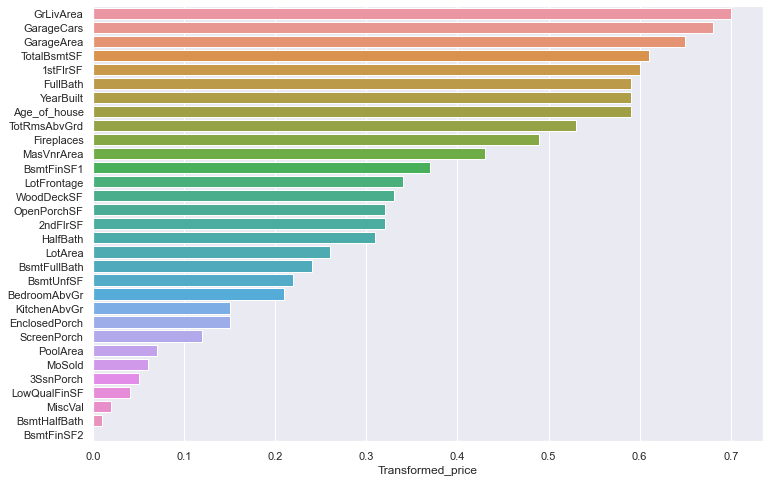

In [103]:
# Correlation of features with target variable Transformed_price
plt.figure(figsize=[12,8])
sns.barplot(correlation_target.Transformed_price[2:], correlation_target.index[2:])
plt.show()

Here the correlation of GrlivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF are the top 5 correlated features with the target variable Transformed_price

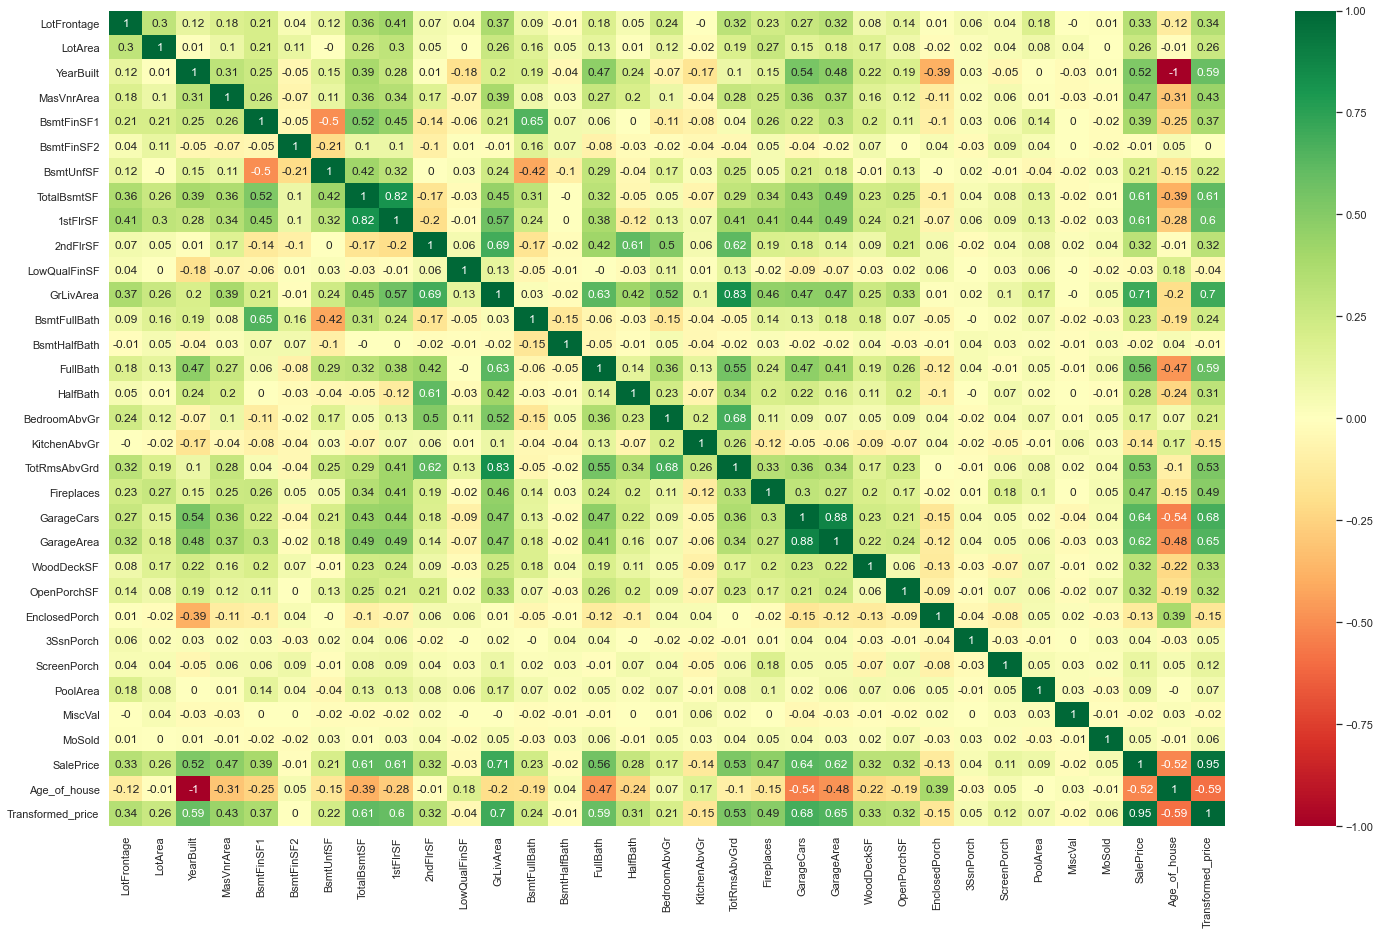

In [104]:
# heatmap for correlation Matrix

f, ax = plt.subplots(figsize=(25,15))
sns.heatmap(correlation, cmap='RdYlGn', annot=True);

# Step 4: Outlier treatment

In [105]:
# Creating list of numerical columns for outlier analysis
num_cols =['LotFrontage', 'LotArea', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'Age_of_house']

In [106]:
# Checking length of numerical columns
len(num_cols)

32

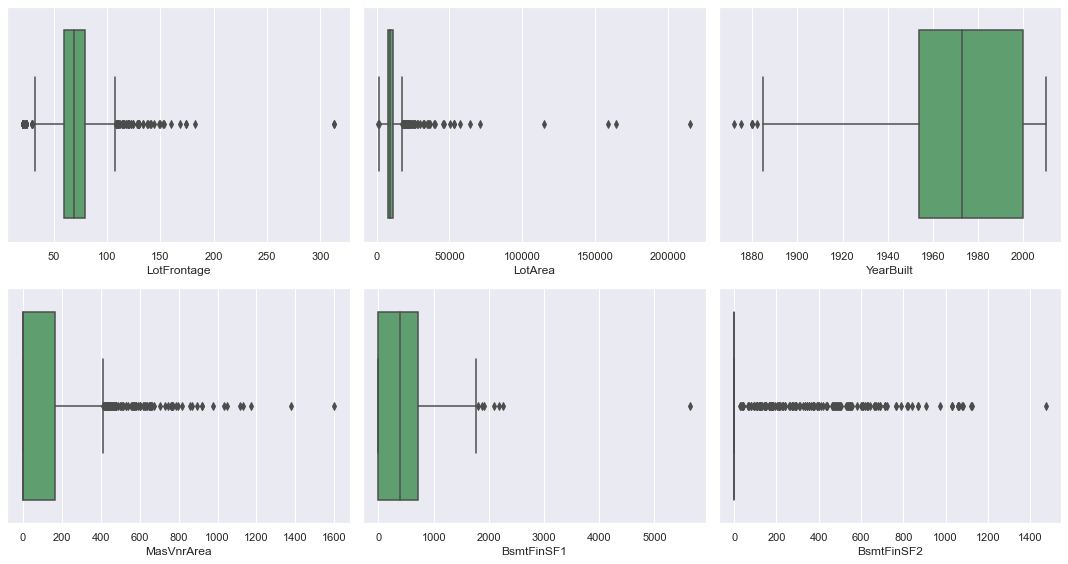

In [107]:
# Plotting box plot for all the numerical columns to check the outliers
plt.figure(figsize=[15,8])

for i in enumerate(num_cols[:6]):
    plt.subplot(2,3, i[0]+1)
    sns.boxplot(housing[i[1]], color= 'g')
    plt.tight_layout()
plt.show()

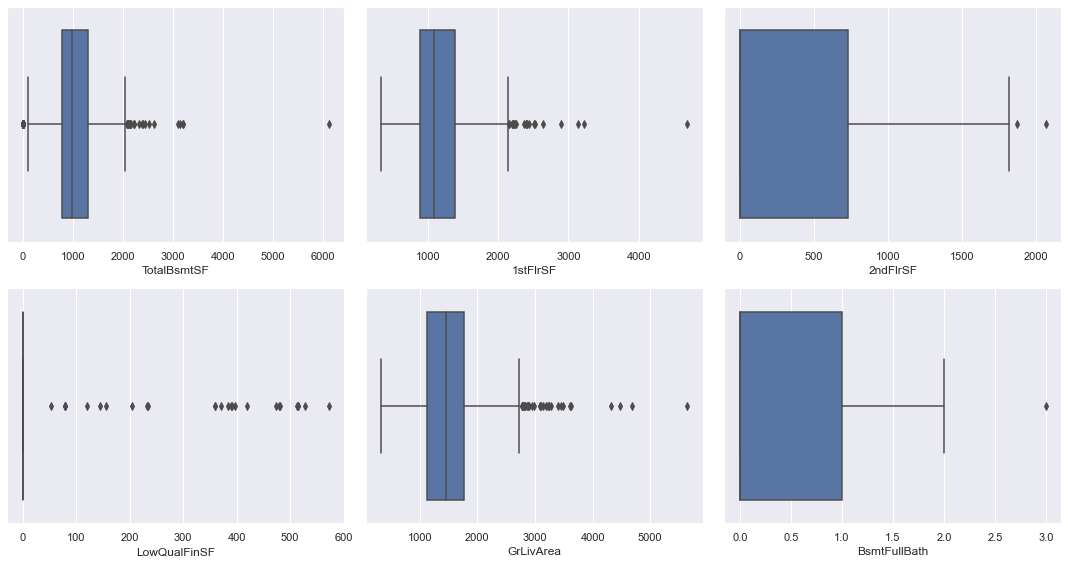

In [108]:
# Plotting box plot for all the numerical columns to check the outliers

plt.figure(figsize=[15,8])

for i in enumerate(num_cols[7:13]):
    plt.subplot(2,3, i[0]+1)
    sns.boxplot(housing[i[1]])
    plt.tight_layout()
plt.show()

From the above plot, we can see that LowQualFinSF columns is completely filled with only 0.00, hence, we can drop this column from the data

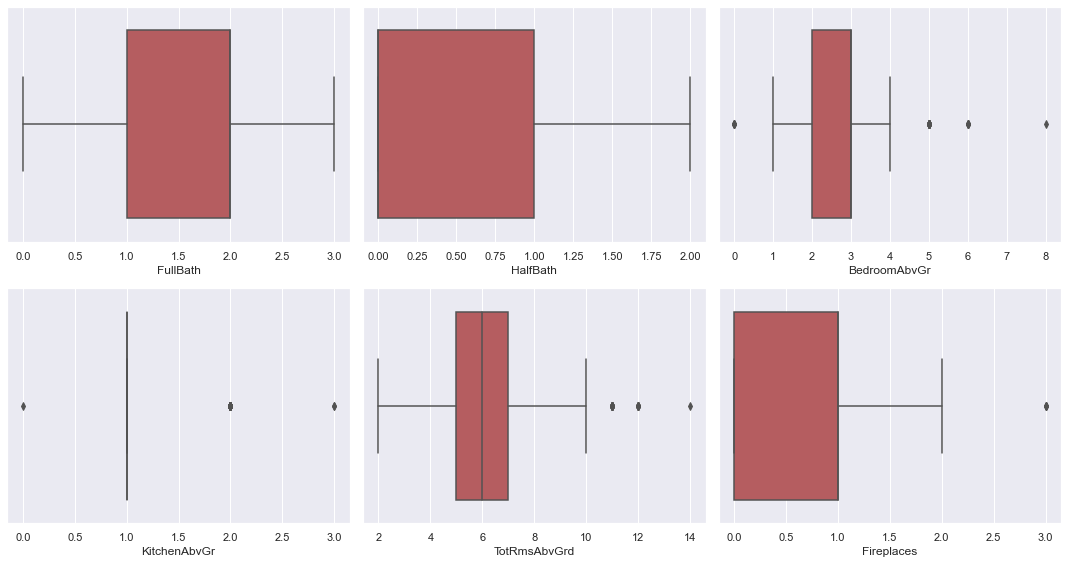

In [109]:
# Plotting box plot for all the numerical columns to check the outliers

plt.figure(figsize=[15,8])

for i in enumerate(num_cols[14:20]):
    plt.subplot(2,3, i[0]+1)
    sns.boxplot(housing[i[1]],color= 'r')
    plt.tight_layout()
plt.show()

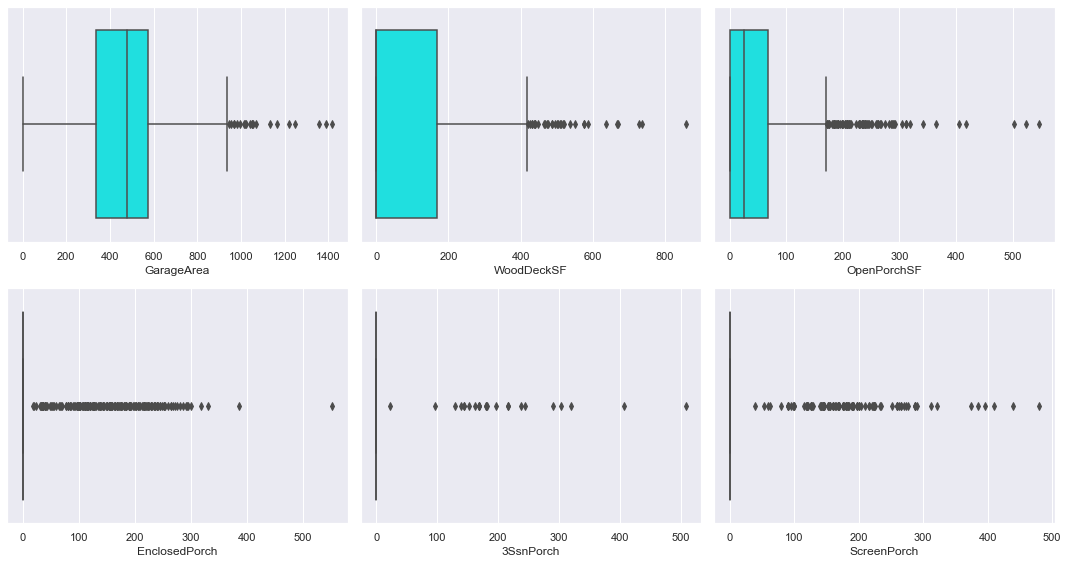

In [110]:
# Plotting box plot for all the numerical columns to check the outliers

plt.figure(figsize=[15,8])

for i in enumerate(num_cols[21:27]):
    plt.subplot(2,3, i[0]+1)
    sns.boxplot(housing[i[1]], color='cyan')
    plt.tight_layout()
plt.show()

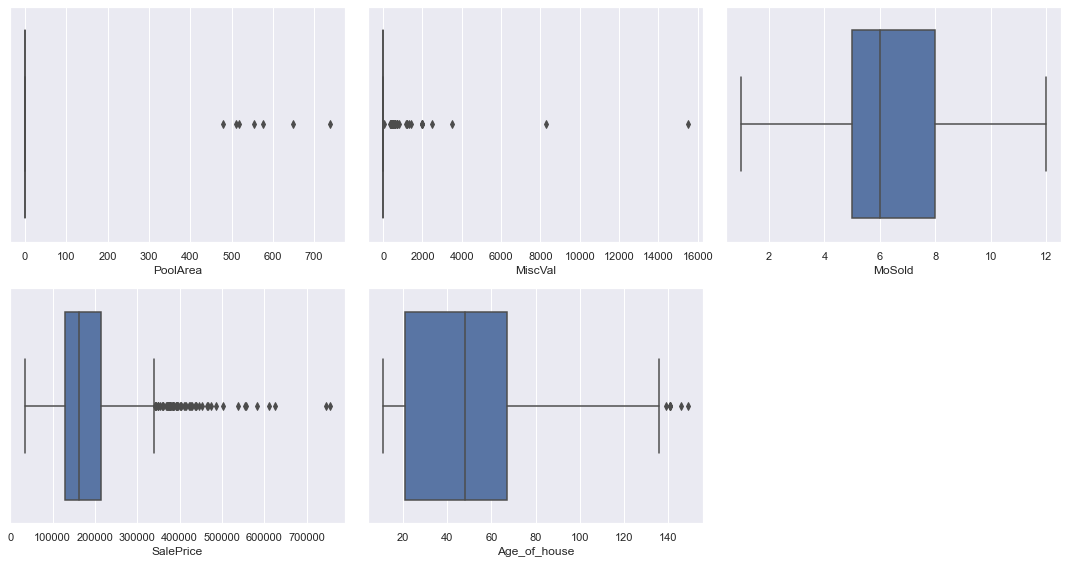

In [111]:
# Plotting box plot for all the numerical columns to check the outliers

plt.figure(figsize=[15,8])

for i in enumerate(num_cols[27:]):
    plt.subplot(2,3, i[0]+1)
    sns.boxplot(housing[i[1]])
    plt.tight_layout()
plt.show()

As we can see from the above box plots there are so many outliers in the data, although we may loose the data, outliers might impact our model so we are removing only few outliers by doing Hardcapping. 

Lets do hard capping for all the columns. We are taking lower and upper quantiles as 0.05 and 0.95 and removing rest of the data

In [112]:
# Outlier capping for all the columns 

for col in num_cols:    
    Q1 = housing[col].quantile(0.05)
    Q3 = housing[col].quantile(0.95)
    IQR = Q3-Q1
    housing = housing[(housing[col] >= (Q1-1.5*IQR))&(housing[col] <= (Q3 + 1.5*IQR))]

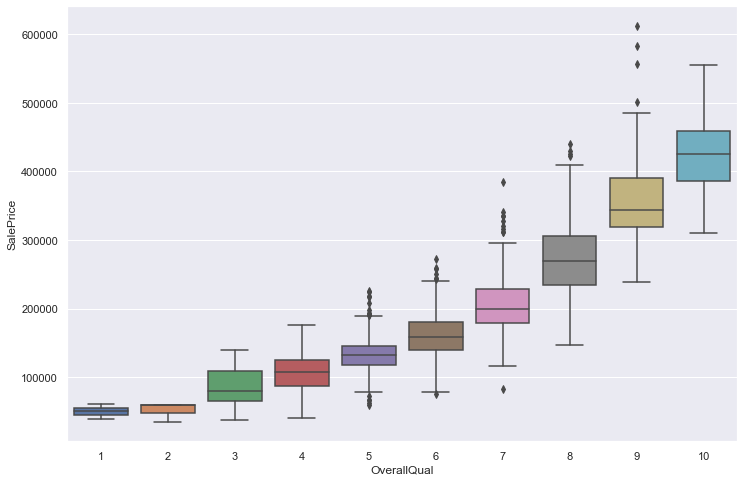

In [113]:
# Outlier Analysis
# box plot overallqual vs salesprice

plt.figure(figsize=[12,8])
sns.boxplot(housing.OverallQual, housing.SalePrice)
plt.show()

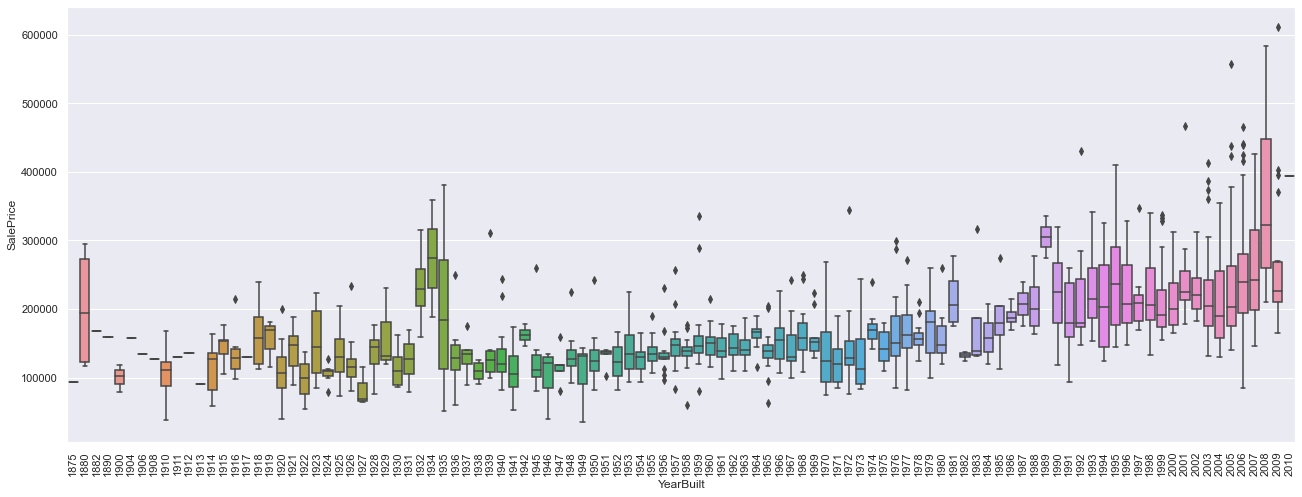

In [114]:
# Outlier Analysis
# box plot YearBuild vs salesprice

plt.figure(figsize=[22,8])
sns.boxplot(housing.YearBuilt, housing.SalePrice)
plt.xticks(rotation = 90)
plt.show()

In [115]:
# Checking shape after outlier removal
housing.shape

(1265, 73)

After outlier removal, we have 1265 rows and 73 columns

Lets drop year column from the data since we have created new column with Age_of_house

In [116]:
# Dropping YearBuild column since we have already created the Age_of_house column
housing.drop('YearBuilt', axis = 1, inplace = True)

In [117]:
# Checking stats of columns 'PoolArea','MiscVal','KitchenAbvGr','LowQualFinSF'

housing[['PoolArea','MiscVal','KitchenAbvGr','LowQualFinSF']].describe()

,PoolArea,MiscVal,KitchenAbvGr,LowQualFinSF
count,1265.0,1265.0,1265.0,1265.0
mean,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.0
25%,0.0,0.0,1.0,0.0
50%,0.0,0.0,1.0,0.0
75%,0.0,0.0,1.0,0.0
max,0.0,0.0,1.0,0.0


In [118]:
# Dropping 'PoolArea','MiscVal','KitchenAbvGr','LowQualFinSF' columns since these columns have no variance 

housing.drop(['PoolArea','MiscVal','KitchenAbvGr','LowQualFinSF'], 1, inplace = True)

<!-- MSSubClass
MSZoning
Alley
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
MiscFeature
SaleCondition
SaleType -->

# Step : 5 Creating Dummies

In [119]:
# Dummies for all the categorical columns in the data
housing_final =  pd.get_dummies(housing, drop_first=True)

In [120]:
# Describing the data after dummies created
housing_final.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice,Age_of_house,Transformed_price,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.0,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,...,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,69.109091,9645.244269,103.143874,441.775494,40.313043,575.095652,1057.184190,1144.113043,336.112253,1480.225296,0.420553,0.053755,1.540711,0.392885,2.816601,6.393676,0.615020,1.783399,475.984190,93.659289,45.854545,21.126482,0.0,14.808696,6.293281,181615.098024,47.539921,12.031824,0.049012,0.001581,0.009486,0.097233,0.215810,0.043478,0.006324,0.041107,0.015020,0.004743,0.065613,0.046640,...,0.212648,0.619763,0.012648,0.064032,0.003162,0.255336,0.043478,0.043478,0.296443,0.405534,0.029249,0.007115,0.043478,0.001581,0.917787,0.022134,0.005534,0.043478,0.003953,0.924111,0.020553,0.926482,0.038735,0.103557,0.006324,0.814229,0.000791,0.003162,0.001581,0.004743,0.002372,0.003953,0.090909,0.001581,0.862451,0.001581,0.001581,0.013439,0.823715,0.093281
std,19.960343,4131.446118,170.825277,428.599290,138.036359,439.959096,397.982277,367.956804,424.242014,481.313992,0.500210,0.229102,0.538218,0.496615,0.739618,1.508402,0.629895,0.730577,208.363306,120.268602,60.698644,59.213301,0.0,53.253601,2.695841,75857.027043,29.439251,0.392580,0.215978,0.039746,0.096972,0.296392,0.411546,0.204012,0.079304,0.198616,0.121679,0.068734,0.247702,0.210951,...,0.409343,0.485637,0.111795,0.244906,0.056165,0.436222,0.204012,0.204012,0.456869,0.491189,0.168570,0.084081,0.204012,0.039746,0.274798,0.147179,0.074211,0.204012,0.062770,0.264926,0.141940,0.261088,0.193039,0.304806,0.079304,0.389075,0.028116,0.056165,0.039746,0.068734,0.048660,0.062770,0.287593,0.039746,0.344563,0.039746,0.039746,0.115190,0.381213,0.290940
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,35311.000000,11.000000,10.471950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000

In [121]:
housing_final.columns[:30]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold',
       'SalePrice', 'Age_of_house', 'Transformed_price', 'MSSubClass_30',
       'MSSubClass_40'],
      dtype='object')

In [122]:
# Dropping SalePrice since we have transformed the Price column
housing_final.drop('SalePrice', 1, inplace= True)

In [123]:
# final Shape of the dataframe 
housing_final.shape

(1265, 253)

# Step 6: Train test split

In [124]:
# Dividing the data to X and y 

X = housing_final.drop('Transformed_price', axis =1)
y = housing_final[['Transformed_price']]

In [125]:
# splitting the data to x_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100, test_size = 0.3)


In [126]:
# Checking shapes of train and test data after split

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((885, 252), (380, 252), (885, 1), (380, 1))

# Step 7: Scaling

In [127]:
# Saving columns to scale to a list

cols_to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold','Age_of_house']

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
# Scaling data for train data using MinMaxScaler

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])



In [130]:
# Transforming test data

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [131]:
# Checking stats of X_train again

X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,Age_of_house,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.00000,885.000000,885.000000,885.000000,885.000000,885.0,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.00000,885.0,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.0,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.318009,0.240974,0.094827,0.202677,0.042283,0.247700,0.331623,0.283426,0.188659,0.368223,0.214124,0.030508,0.515254,0.193220,0.471375,0.443729,0.206780,0.45113,0.346205,0.139135,0.124533,0.059372,0.0,0.040376,0.478788,0.283225,0.047458,0.002260,0.011299,0.101695,0.216949,0.042938,0.003390,0.039548,0.016949,0.002260,0.064407,0.039548,0.006780,0.010169,...,0.225989,0.614689,0.013559,0.071186,0.002260,0.263277,0.032768,0.032768,0.299435,0.404520,0.030508,0.006780,0.032768,0.002260,0.926554,0.022599,0.005650,0.032768,0.004520,0.933333,0.014689,0.927684,0.040678,0.102825,0.007910,0.80904,0.0,0.004520,0.001130,0.003390,0.001130,0.002260,0.090395,0.0,0.863277,0.002260,0.001130,0.009040,0.818079,0.091525
std,0.129827,0.120788,0.156840,0.195710,0.143857,0.189457,0.128439,0.129693,0.239037,0.158827,0.249827,0.122087,0.183329,0.248205,0.125832,0.154487,0.211662,0.17781,0.147720,0.178020,0.167222,0.158716,0.0,0.140182,0.247478,0.225914,0.212736,0.047511,0.105756,0.302418,0.412401,0.202832,0.058156,0.195005,0.129154,0.047511,0.245615,0.195005,0.082106,0.100387,...,0.418468,0.486944,0.115718,0.257281,0.047511,0.440660,0.178130,0.178130,0.458270,0.491076,0.172079,0.082106,0.178130,0.047511,0.261015,0.148705,0.074994,0.178130,0.067115,0.249585,0.120374,0.259158,0.197655,0.303902,0.088634,0.39328,0.0,0.067115,0.033615,0.058156,0.033615,0.047511,0.286910,0.0,0.343749,0.047511,0.033615,0.094699,0.385997,0.288518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [132]:
# Checking stats of X_test again

X_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,Age_of_house,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.000000,380.000000,380.000000,380.000000
mean,0.306123,0.228013,0.087099,0.200119,0.039590,0.242666,0.325393,0.271783,0.176080,0.350317,0.201316,0.018421,0.509649,0.203947,0.464912,0.429211,0.200877,0.433553,0.333654,0.142708,0.129331,0.043926,0.0,0.030456,0.486842,0.276073,0.052632,0.0,0.005263,0.086842,0.213158,0.044737,0.013158,0.044737,0.010526,0.010526,0.068421,0.063158,0.010526,0.005263,...,0.181579,0.631579,0.010526,0.047368,0.005263,0.236842,0.068421,0.068421,0.289474,0.407895,0.026316,0.007895,0.068421,0.0,0.897368,0.021053,0.005263,0.068421,0.002632,0.902632,0.034211,0.923684,0.034211,0.105263,0.002632,0.826316,0.002632,0.0,0.002632,0.007895,0.005263,0.007895,0.092105,0.005263,0.860526,0.0,0.002632,0.023684,0.836842,0.097368
std,0.131718,0.108609,0.144447,0.196543,0.137790,0.185907,0.113528,0.120775,0.219610,0.135494,0.250853,0.094311,0.170089,0.248712,0.117121,0.141661,0.206177,0.193118,0.154706,0.184883,0.165832,0.139852,0.0,0.120039,0.239616,0.227932,0.223591,0.0,0.072452,0.281975,0.410078,0.206998,0.114101,0.206998,0.102191,0.102191,0.252800,0.243567,0.102191,0.072452,...,0.386005,0.483012,0.102191,0.212706,0.072452,0.425705,0.252800,0.252800,0.454116,0.492091,0.160284,0.088618,0.252800,0.0,0.303877,0.143749,0.072452,0.252800,0.051299,0.296850,0.182009,0.265853,0.182009,0.307297,0.051299,0.379337,0.051299,0.0,0.051299,0.088618,0.072452,0.088618,0.289556,0.072452,0.346897,0.0,0.051299,0.152264,0.369997,0.296850
min,0.000000,0.005426,0.000000,0.000000,0.000000,0.000000,0.000000,0.051486,0.000000,0.085787,0.000000,0.000000,0.333333,0.000000,0.166667,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007692,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

# Step 8: Model Building and Evaluation

## Linear Regression

Let's now try predicting Sale prices of house, a dataset using linear regression.

In [133]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

[2.64977906e+09]
[[ 5.64899104e-02  1.97578419e-01  3.20932911e-02  1.58807070e+11
   7.05486617e+10  1.69549047e+11 -2.32694454e+11  1.39010712e+11
   8.73260103e+10 -1.51739751e+11  3.39508057e-02  2.84709930e-02
   2.80475616e-02  5.67245483e-03  3.10592651e-02 -1.00555420e-02
   1.73721313e-02  1.04747772e-01  6.92291260e-02  4.28085327e-02
   6.93526268e-02  2.07519531e-02 -4.04462150e+10  1.16808891e-01
  -1.02043152e-02 -4.37938690e-01  1.19209290e-02  8.29629898e-02
  -7.14358414e+09  2.05993652e-03 -6.69403076e-02  1.00250244e-02
   9.82818371e+09 -6.29425049e-03  6.38217926e-02 -9.41787691e+09
   4.24804688e-02 -8.19644928e-02  1.06042385e-01 -1.90983772e-01
   4.23372269e-01  4.70319271e-01  4.15786743e-01  3.48037720e-01
  -5.59501648e-02 -4.41942215e-02  1.85880661e-02  6.42299652e-03
   9.94873047e-03  2.72426605e-02 -2.60910988e-02  1.24416351e-02
   1.21116638e-02 -5.60121536e-02  2.53534317e-02 -1.89819336e-02
  -8.34369659e-03 -9.03217793e-02  5.25145531e-02  1.006889

In [135]:
# Creating function to get metrics of the model created

def metrics(X_train, X_test, y_train, y_test, model):
    metric = []
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train_lr = r2_score(y_train, y_pred_train)
    r2_test_lr = r2_score(y_test, y_pred_test)
    rss1_lr = np.sum(np.square(y_train - y_pred_train.reshape(-1,1)))[0]
    rss2_lr = np.sum(np.square(y_test - y_pred_test.reshape(-1,1)))[0]
    mse_train_lr = mean_squared_error(y_train, y_pred_train.reshape(-1,1))
    mse_test_lr = mean_squared_error(y_test, y_pred_test.reshape(-1,1))
    print("r2_score train data: ",r2_train_lr)
    print("r2_score test data: ", r2_test_lr)
    print("RSS train data: ",rss1_lr)
    print("RSS test data: ",rss2_lr)
    print("MSE train data: ", mse_train_lr)
    print("MSE test data: ", mse_test_lr)
    
    metric.append(r2_train_lr)
    metric.append(r2_test_lr)
    metric.append(rss1_lr)
    metric.append(rss2_lr)
    metric.append(mse_train_lr**0.5)
    metric.append(mse_test_lr**0.5)
    return metric

In [136]:
# Saving the returning list to metric_lm for linear model

metric_lm = metrics(X_train,X_test,y_train, y_test, lm)

r2_score train data:  0.9607005355239119
r2_score test data:  -2.0616507321273917e+18
RSS train data:  5.494862068876416
RSS test data:  1.1295950732640764e+20
MSE train data:  0.006208883693645668
MSE test data:  2.9726186138528326e+17


As we can see clearly for train data the r2 score is great, however, for test data the linear model is failing and unable to perform well. We are using Ridge and Lasso to get more better results with the same data

## Ridge regression

In [137]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params ={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating Ridge instance
ridge = Ridge()

# Cross validation using GridSearchCV
folds = 5
model_cv_r = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_r.fit(X_train, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [138]:
# Saving alpha value, meantestscore and mean train score in a dataframe
Ridge_results = pd.DataFrame(model_cv_r.cv_results_)
Ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025132,0.013461,0.009972,0.007597,0.0001,{'alpha': 0.0001},-0.083556,-0.091762,-0.083708,-0.088845,-0.098974,-0.089369,0.005729,34,-0.054440,-0.053074,-0.054896,-0.053598,-0.052739,-0.053750,0.000811
1,0.024325,0.007726,0.004793,0.000743,0.0002,{'alpha': 0.0002},-0.083549,-0.091756,-0.083698,-0.088822,-0.098961,-0.089357,0.005728,33,-0.054441,-0.053075,-0.054897,-0.053600,-0.052741,-0.053751,0.000811
2,0.021541,0.003651,0.007179,0.002476,0.0003,{'alpha': 0.0003},-0.083543,-0.091751,-0.083688,-0.088798,-0.098948,-0.089346,0.005726,32,-0.054443,-0.053075,-0.054898,-0.053602,-0.052743,-0.053752,0.000811
3,0.014791,0.002791,0.004096,0.002814,0.0004,{'alpha': 0.0004},-0.083536,-0.091745,-0.083679,-0.088775,-0.098934,-0.089334,0.005725,31,-0.054444,-0.053076,-0.054899,-0.053604,-0.052744,-0.053754,0.000811
4,0.011969,0.001669,0.003390,0.000799,0.0005,{'alpha': 0.0005},-0.083530,-0.091740,-0.083669,-0.088752,-0.098921,-0.089322,0.005724,30,-0.054446,-0.053076,-0.054900,-0.053606,-0.052746,-0.053755,0.000811


In [139]:
# Printing the best hyperparameter alpha
print(model_cv_r.best_params_)

{'alpha': 2.0}


In [140]:
# Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 7.10832704e-02  1.33039901e-01  4.66561424e-02  1.86873952e-01
   3.28175791e-02  7.91832518e-02  1.95181213e-01  2.68723133e-01
   1.60219584e-01  3.38386815e-01  5.31661088e-02  2.87453196e-02
   9.26986902e-02  4.24483913e-02  2.26734621e-02  8.73048483e-02
   3.80217344e-02  9.62232697e-02  9.29355592e-02  5.23095535e-02
   5.75074735e-02  1.65561297e-02  0.00000000e+00  8.51816571e-02
  -3.96493750e-04 -1.92373621e-01 -1.82453842e-02  6.01776535e-02
   2.82212647e-03  1.03485984e-04 -1.30033664e-02  5.04674661e-02
   8.75474492e-03 -5.48083895e-03  1.11620518e-02 -1.57747494e-02
  -2.26942782e-03 -5.12834659e-02  6.71132477e-03 -2.19495361e-02
   7.51330249e-02  1.04015098e-01  7.75776650e-02  5.12098625e-02
  -3.41328015e-02  2.65030232e-05  2.26353722e-02  1.95659772e-02
   1.11615256e-03  1.49387503e-02 -3.62708998e-02  6.40984341e-03
   1.69709409e-02 -5.41008469e-02 -7.26659424e-03 -2.30730012e-02
  -1.43535214e-02 -2.84265497e-02 -2.48358029e-03  1.61634937e-02
   5.31678

In [141]:
# Checking metrics for Ridge regression

metric_ridge = metrics(X_train,X_test, y_train, y_test, ridge)

r2_score train data:  0.9539971709769403
r2_score test data:  0.8992524403056452
RSS train data:  6.4321283668794536
RSS test data:  5.520040097028887
MSE train data:  0.007267941657490908
MSE test data:  0.014526421307970756


## Lasso Regression

In [142]:
# Creating Lasso instance

lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [143]:
# Saving results of lasso in dataframe
lasso_results = pd.DataFrame(model_cv_l.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124352,0.026633,0.005190,0.001470,0.0001,{'alpha': 0.0001},-0.081088,-0.081331,-0.074626,-0.082068,-0.084303,-0.080683,0.003234,5,-0.057855,-0.056993,-0.058941,-0.057241,-0.056912,-0.057589,0.000753
1,0.046875,0.007302,0.003392,0.000488,0.0002,{'alpha': 0.0002},-0.080077,-0.078985,-0.072788,-0.082319,-0.082522,-0.079338,0.003538,3,-0.059711,-0.059309,-0.061216,-0.058894,-0.059132,-0.059652,0.000826
2,0.035106,0.004902,0.003790,0.001323,0.0003,{'alpha': 0.0003},-0.080305,-0.079149,-0.071505,-0.082189,-0.082078,-0.079045,0.003938,1,-0.061305,-0.061104,-0.063193,-0.060540,-0.060921,-0.061413,0.000925
3,0.033114,0.003176,0.003393,0.001027,0.0004,{'alpha': 0.0004},-0.080432,-0.079550,-0.071496,-0.082269,-0.082536,-0.079257,0.004038,2,-0.062537,-0.062649,-0.064866,-0.062069,-0.062290,-0.062882,0.001012
4,0.027229,0.003509,0.003392,0.000798,0.0005,{'alpha': 0.0005},-0.080433,-0.080278,-0.071580,-0.082553,-0.082920,-0.079553,0.004128,4,-0.063867,-0.064131,-0.066594,-0.063513,-0.063566,-0.064334,0.001152


In [144]:
# Printing the best hyperparameter alpha
print(model_cv_l.best_params_)

{'alpha': 0.0003}


In [145]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [146]:
# printing Lasso coefficients which have been penalised
print(lasso.intercept_)
print(lasso.coef_)

[11.23962262]
[ 6.13941986e-02  1.31152581e-01  1.07941621e-02  1.32327847e-01
  0.00000000e+00  0.00000000e+00  2.80403749e-01  3.78288754e-02
  0.00000000e+00  8.60656988e-01  4.97326081e-02  1.27506479e-02
  3.77368860e-02  3.09205494e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.29754251e-01  4.57843611e-02  4.33314864e-02
  4.83346343e-02  1.37554842e-02  0.00000000e+00  9.02746298e-02
 -2.16618643e-03 -2.98006320e-01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.46762002e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.65261225e-02  0.00000000e+00 -0.00000000e+00
  1.74682471e-02  5.05861572e-02  3.34734202e-02 -0.00000000e+00
 -3.43761644e-02  1.05893798e-03  4.32736265e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.78890174e-02  0.00000000e+00
  1.48288734e-02 -2.72049788e-02  0.00000000e+00 -1.82717822e-02
 -6.73863550e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.3386278

In [147]:
# Metrics for lasso regression

metric_lasso = metrics(X_train,X_test, y_train, y_test, lasso)

r2_score train data:  0.9510246629517728
r2_score test data:  0.9004988354016176
RSS train data:  6.8477452668721135
RSS test data:  5.451749103903293
MSE train data:  0.007737565273301823
MSE test data:  0.01434670816816656


In [148]:
# taking coefficients of Linear, Ridge and Lasso in dataframe

betas = pd.DataFrame(index=X.columns)

In [149]:
betas.rows = X.columns

In [150]:
betas['Linear'] = abs(lm.coef_.reshape(-1,1))
betas['Ridge'] = abs(ridge.coef_.reshape(-1,1))
betas['Lasso'] = abs(lasso.coef_.reshape(-1,1))

In [151]:
betas.head()

,Linear,Ridge,Lasso
LotFrontage,5.648991e-02,0.071083,0.061394
LotArea,1.975784e-01,0.133040,0.131153
MasVnrArea,3.209329e-02,0.046656,0.010794
BsmtFinSF1,1.588071e+11,0.186874,0.132328
BsmtFinSF2,7.054866e+10,0.032818,0.000000


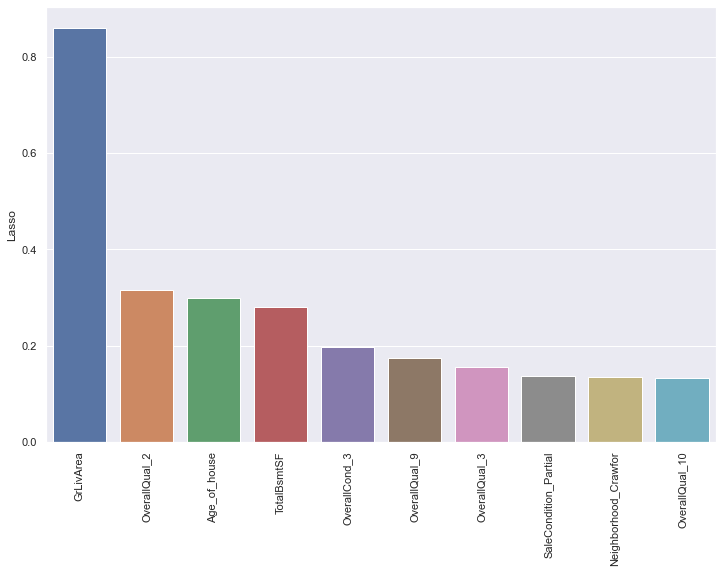

In [152]:
# Lasso top10 coefficients 

top_10_betas = betas.sort_values(['Lasso'], ascending=False).head(10)
plt.figure(figsize=[12,8])
sns.barplot(x =top_10_betas.index, y = top_10_betas['Lasso'])
plt.xticks(rotation = 90)
plt.show()

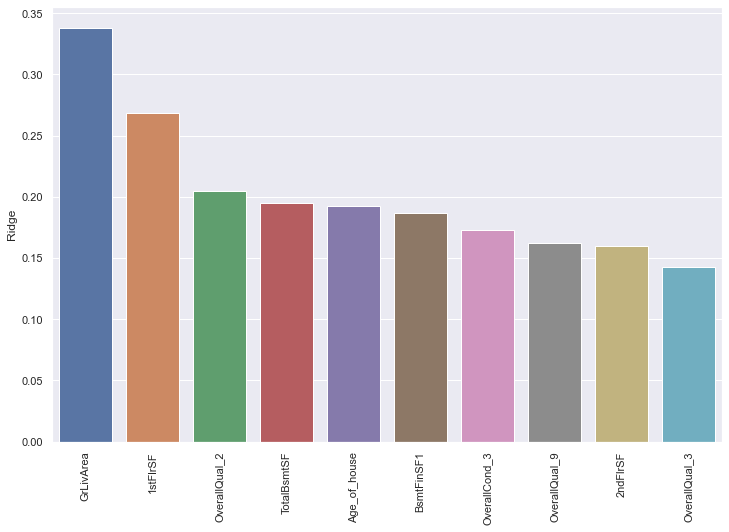

In [153]:
# Ridge top10 coefficients 

top_10_betas = betas.sort_values(['Ridge'], ascending=False).head(10)
plt.figure(figsize=[12,8])
sns.barplot(x =top_10_betas.index, y = top_10_betas['Ridge'])
plt.xticks(rotation = 90)
plt.show()

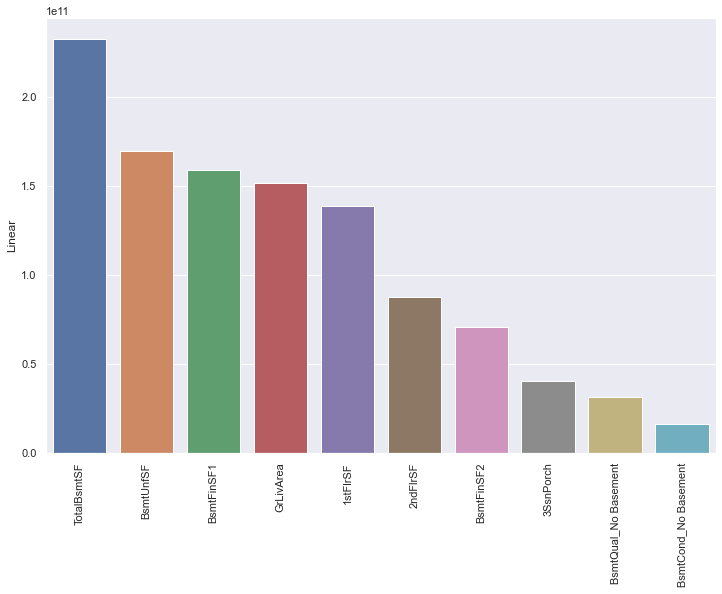

In [154]:
# Linear top10 coefficients

top_10_betas = betas.sort_values(['Linear'], ascending=False).head(10)
plt.figure(figsize=[12,8])
sns.barplot(x =top_10_betas.index, y = top_10_betas['Linear'])
plt.xticks(rotation = 90)
plt.show()

In [155]:
# Columns removed by lasso regression

betas[betas['Lasso'] == 0]

,Linear,Ridge,Lasso
BsmtFinSF2,7.054866e+10,0.032818,0.0
BsmtUnfSF,1.695490e+11,0.079183,0.0
2ndFlrSF,8.732601e+10,0.160220,0.0
BedroomAbvGr,3.105927e-02,0.022673,0.0
TotRmsAbvGrd,1.005554e-02,0.087305,0.0
...,...,...,...
SaleType_ConLI,1.005297e-01,0.023902,0.0
SaleType_ConLw,4.049397e-02,0.011458,0.0
SaleType_New,1.391964e-01,0.029334,0.0
SaleType_Oth,0.000000e+00,0.000000,0.0


In [156]:
# Columns list removed by Lasso regression

betas[betas['Lasso'] == 0].index

Index(['BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', '3SsnPorch', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45',
       ...
       'Fence_MnWw', 'Fence_No Fence', 'MiscFeature_Shed', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Alloca'],
      dtype='object', length=110)

In [157]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric_lm
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.607005e-01,0.953997,0.951025
1,R2 Score (Test),-2.061651e+18,0.899252,0.900499
2,RSS (Train),5.494862e+00,6.432128,6.847745
3,RSS (Test),1.129595e+20,5.520040,5.451749
4,RMSE (Train),7.879647e-02,0.085252,0.087963
5,RMSE (Test),5.452173e+08,0.120526,0.119778


- We can see that Linear regression fails in test data as the r2score went negative.
- In Ridge regression, the train data r2 score is 0.95 while in test data it is 0.89
- In lasso regression, the train data r2 score is 0.95 while in test data it is 0.90

Finally, we can conclude that Lasso model is performing well with the data, also the model is robust. It also removes the redundant variables from the model by reducing the coefficients to zero.

### Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?



In [158]:
Ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025132,0.013461,0.009972,0.007597,0.0001,{'alpha': 0.0001},-0.083556,-0.091762,-0.083708,-0.088845,-0.098974,-0.089369,0.005729,34,-0.054440,-0.053074,-0.054896,-0.053598,-0.052739,-0.053750,0.000811
1,0.024325,0.007726,0.004793,0.000743,0.0002,{'alpha': 0.0002},-0.083549,-0.091756,-0.083698,-0.088822,-0.098961,-0.089357,0.005728,33,-0.054441,-0.053075,-0.054897,-0.053600,-0.052741,-0.053751,0.000811
2,0.021541,0.003651,0.007179,0.002476,0.0003,{'alpha': 0.0003},-0.083543,-0.091751,-0.083688,-0.088798,-0.098948,-0.089346,0.005726,32,-0.054443,-0.053075,-0.054898,-0.053602,-0.052743,-0.053752,0.000811
3,0.014791,0.002791,0.004096,0.002814,0.0004,{'alpha': 0.0004},-0.083536,-0.091745,-0.083679,-0.088775,-0.098934,-0.089334,0.005725,31,-0.054444,-0.053076,-0.054899,-0.053604,-0.052744,-0.053754,0.000811
4,0.011969,0.001669,0.003390,0.000799,0.0005,{'alpha': 0.0005},-0.083530,-0.091740,-0.083669,-0.088752,-0.098921,-0.089322,0.005724,30,-0.054446,-0.053076,-0.054900,-0.053606,-0.052746,-0.053755,0.000811


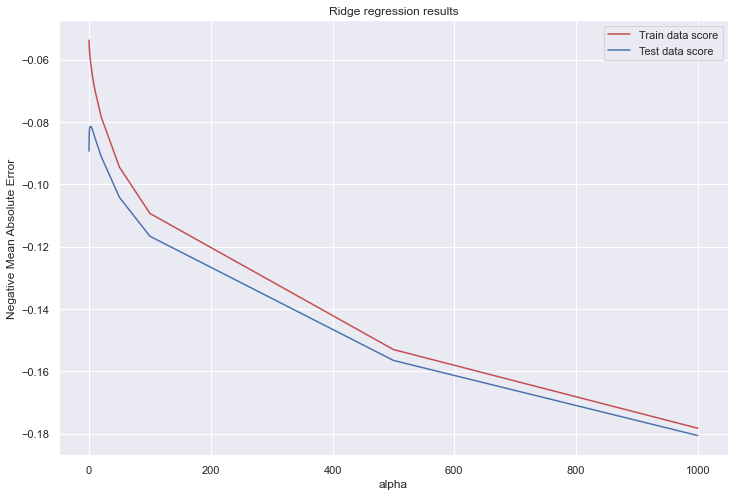

In [159]:
# Plot mean test and train scores against alpha

Ridge_results['param_alpha'] = Ridge_results['param_alpha'].astype('float32')

# Plotting
plt.figure(figsize=[12,8])
plt.plot(Ridge_results['param_alpha'] , Ridge_results['mean_train_score'],color = 'r',label = 'Train data score')
plt.plot(Ridge_results['param_alpha'] , Ridge_results['mean_test_score'],color = 'b',label = 'Test data score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge regression results")
plt.show()

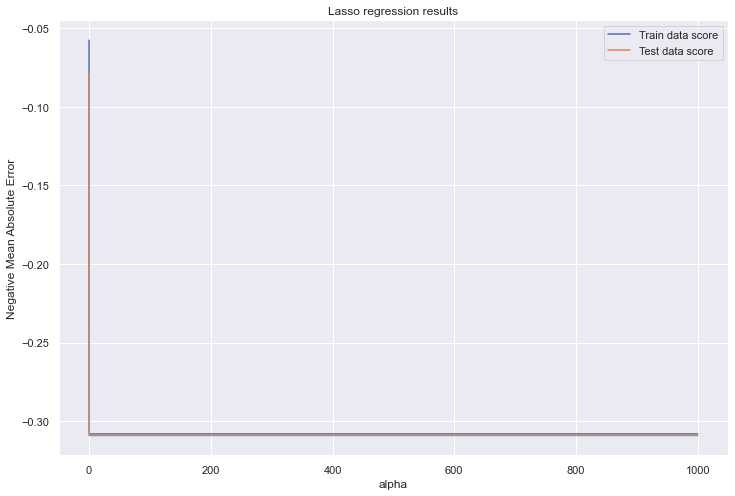

In [160]:
# Plot mean test and train scores against alpha

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# Plotting
plt.figure(figsize=[12,8])
plt.plot(lasso_results['param_alpha'] , lasso_results['mean_train_score'], label = 'Train data score')
plt.plot(lasso_results['param_alpha'] , lasso_results['mean_test_score'], label = 'Test data score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso regression results")
plt.show()

As we can see from the above plots, the best recommended alpha for ridge is approximately 2 and lasso is approxmately near to zero which is 0.0003

In [161]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised

alpha = 4.0 


ridge_double = Ridge(alpha=alpha)
        
ridge_double.fit(X_train, y_train) 

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [162]:
# Metrics of original ridge regression

metric_ridge

[0.9539971709769403,
 0.8992524403056452,
 6.4321283668794536,
 5.520040097028887,
 0.08525222376859684,
 0.12052560436675169]

In [163]:
# checking metrics for ridge regression after doubling the alpha value
metric_ridge_double = metrics(X_train,X_test,y_train,y_test, ridge_double)

r2_score train data:  0.9496592438804241
r2_score test data:  0.9032731924568292
RSS train data:  7.038658541729572
RSS test data:  5.2997398419945725
MSE train data:  0.007953286487830025
MSE test data:  0.01394668379472256


In [164]:
# Adding final metrics to metric table 
final_metric['Ridge_double'] = metric_ridge_double

In [165]:
#Fitting lasso model for alpha = 0.0006 and printing coefficients which have been penalised

alpha = 0.0006 


lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train, y_train) 

Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [166]:
# metrics with alpha value of 0.0003
metric_lasso

[0.9510246629517728,
 0.9004988354016176,
 6.8477452668721135,
 5.451749103903293,
 0.08796343145479162,
 0.11977774487844793]

In [167]:
# checking metrics for Lasso regression after doubling the alpha value 0.0006

lasso_metrics_double = metrics(X_train,X_test,y_train,y_test, lasso_double)

r2_score train data:  0.9435068834338138
r2_score test data:  0.9080228097578033
RSS train data:  7.898883292952436
RSS test data:  5.0395044772228745
MSE train data:  0.00892529185644343
MSE test data:  0.013261853887428617


In [168]:
# Adding metrics of double alpha Lasso to the final metric dataframe

final_metric['Lasso Double'] = lasso_metrics_double

In [169]:
# Metrics of all the models created

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge_double,Lasso Double
0,R2 Score (Train),9.607005e-01,0.953997,0.951025,0.949659,0.943507
1,R2 Score (Test),-2.061651e+18,0.899252,0.900499,0.903273,0.908023
2,RSS (Train),5.494862e+00,6.432128,6.847745,7.038659,7.898883
3,RSS (Test),1.129595e+20,5.520040,5.451749,5.299740,5.039504
4,RMSE (Train),7.879647e-02,0.085252,0.087963,0.089181,0.094474
5,RMSE (Test),5.452173e+08,0.120526,0.119778,0.118096,0.115160


In [170]:
# Creating dataframes with coefficients 

betas_new = pd.DataFrame(index=X.columns)

In [171]:
# Creating dataframes with coefficients 

betas_new['Ridge'] = abs(ridge_double.coef_.reshape(-1,1))
betas_new['Lasso'] = abs(lasso_double.coef_.reshape(-1,1))

In [172]:
# sorting dataframe with Lasso and Ridge coefficients

top10_double = betas_new.sort_values(by = ['Lasso','Ridge'], ascending=False).head(10)

In [173]:
# Top 10 significant variables from Lasso and Ridge after doubling alpha
top10_double

,Ridge,Lasso
GrLivArea,0.290441,0.899817
TotalBsmtSF,0.181714,0.273638
Age_of_house,0.135820,0.254077
OverallCond_3,0.155375,0.210983
OverallQual_2,0.144311,0.175172
OverallQual_9,0.142837,0.164744
GarageCars,0.099429,0.146058
SaleCondition_Partial,0.076061,0.135019
BsmtFinSF1,0.170352,0.130409
Neighborhood_Crawfor,0.112530,0.127240


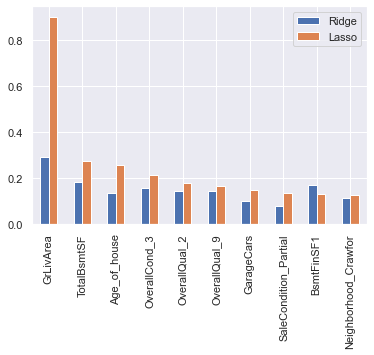

In [174]:
top10_double.plot(kind='bar')
plt.show()

### Question 3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [175]:
# Top 5 significant variables in Lasso

betas[['Lasso']].sort_values(by = 'Lasso',ascending = False).head()

,Lasso
GrLivArea,0.860657
OverallQual_2,0.314814
Age_of_house,0.298006
TotalBsmtSF,0.280404
OverallCond_3,0.196492


In [176]:
# adding to a list to remove top 5 columns of lasso regression

cols_to_remove = ['GrLivArea','OverallQual_2','Age_of_house','TotalBsmtSF','OverallCond_3']

In [177]:
# Creating new X_train and X_test by removing the above columns

X_train_new = X_train.drop(cols_to_remove, axis = 1)
X_test_new = X_test.drop(cols_to_remove, axis = 1)

In [178]:
# Creating Lasso instance

lasso_1 = Lasso()

# cross validation
model_cv_new = GridSearchCV(estimator = lasso_1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_train_new, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [179]:
# Best value for alpha

model_cv_new.best_params_

{'alpha': 0.0002}

In [180]:
#Fitting lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha = 0.0002


lasso_1 = Lasso(alpha=alpha)
        
lasso_1.fit(X_train_new, y_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [181]:
# Metrics after removing top 5  vatiables 

metrics(X_train_new,X_test_new,y_train,y_test, lasso_1)

r2_score train data:  0.949229271629267
r2_score test data:  0.9050985612900211
RSS train data:  7.0987773816438
RSS test data:  5.19972641058587
MSE train data:  0.008021217380388475
MSE test data:  0.013683490554173342


[0.949229271629267,
 0.9050985612900211,
 7.0987773816438,
 5.19972641058587,
 0.0895612493235131,
 0.11697645299022082]

In [182]:
# Saving the coefficients of Lasso to a dataframe

new_lasso = pd.DataFrame(abs(lasso_1.coef_.reshape(-1,1)), index = X_test_new.columns, columns=['Lasso_new'])

In [183]:

Top5_new_lasso = new_lasso.sort_values('Lasso_new', ascending=False).head(5)


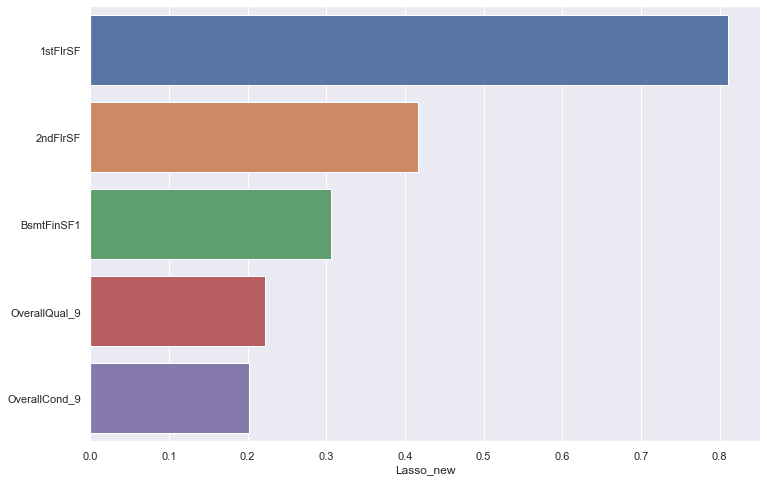

In [184]:
# Top 5 features after removing top 5 features in lasso
plt.figure(figsize=[12,8])
sns.barplot(Top5_new_lasso['Lasso_new'],Top5_new_lasso.index)
plt.show()